In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

from datetime import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use("ggplot")
#plt.rc('font', family='NanumGothic')

# 한글 폰트 설정
#rc('font', family='Malgun Gothic')

pd.set_option("display.max_columns", None)

In [ ]:
customer = pd.read_csv('customers.csv')
location = pd.read_csv('locations.csv')
order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')
payments = pd.read_csv('payments.csv')
product = pd.read_csv('products.csv')
review = pd.read_csv('reviews.csv')
seller = pd.read_csv('sellers.csv')

In [ ]:
customer.nunique()

Customer_id                87955
Customer_unique_id         85112
Customer_zipcode_prefix    14572
Customer_city               3976
Customer_state                27
dtype: int64

In [ ]:
cancel_id = []
for cancel in orders[orders["Order_status"]=="canceled"]["Order_id"]:
  cancel_id.append(cancel)

In [ ]:
cancel_id

['ORDER_02596',
 'ORDER_07781',
 'ORDER_51548',
 'ORDER_52492',
 'ORDER_82044',
 'ORDER_83608']

In [ ]:
orders = orders[orders["Order_status"]!="canceled"]

In [ ]:
order_items = order_items[~order_items["Order_id"].isin(cancel_id)]

In [ ]:
review = review[~review["Order_id"].isin(cancel_id)]

In [ ]:
payments = payments[~payments["Order_id"].isin(cancel_id)]

In [ ]:
product[product["Product_category_name"]=="Unknown"]

,Product_id,Product_category_name,Product_weight_g,Product_length_cm,Product_height_cm,Product_width_cm
95,PRODUCT_00095,Unknown,650.0,17.0,14.0,12.0
115,PRODUCT_00115,Unknown,300.0,16.0,7.0,20.0
129,PRODUCT_00129,Unknown,200.0,20.0,20.0,20.0
137,PRODUCT_00137,Unknown,18500.0,41.0,30.0,41.0
174,PRODUCT_00174,Unknown,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...
29076,PRODUCT_29076,Unknown,1800.0,30.0,20.0,70.0
29140,PRODUCT_29140,Unknown,800.0,30.0,10.0,23.0
29164,PRODUCT_29164,Unknown,200.0,21.0,8.0,16.0
29309,PRODUCT_29309,Unknown,1300.0,45.0,16.0,45.0


### 카테고리별 판매량 수

In [ ]:
order_product = pd.merge(order_items, product, how="left", on="Product_id")
order_product = order_product[["Order_id","Product_category_name", "Price"]]
order_product

,Order_id,Product_category_name,Price
0,ORDER_75477,cool_stuff,58.90
1,ORDER_63604,pet_shop,239.90
2,ORDER_05566,furniture_decor,199.00
3,ORDER_04632,garden_tools,199.90
4,ORDER_61452,home_utilities,21.90
...,...,...,...
100545,ORDER_70405,home_utilities,299.99
100546,ORDER_62069,computers_accessories,350.00
100547,ORDER_46632,sports_leisure,99.90
100548,ORDER_52966,computers_accessories,55.99


In [ ]:
category = order_product.groupby("Product_category_name")["Price"].agg(["count","sum"]).sort_values("count", ascending=False).reset_index()
category

,Product_category_name,count,sum
0,bed_bath_table,10094,943580.26
1,health_beauty,8376,1073200.56
2,sports_leisure,7798,887762.67
3,furniture_decor,7558,651751.40
4,computers_accessories,7075,832695.93
...,...,...,...
67,musical_cds_dvds,14,730.00
68,the_kitchen,14,2054.99
69,arts_and_crafts,11,645.06
70,fashion_childrens_clothes,7,519.95


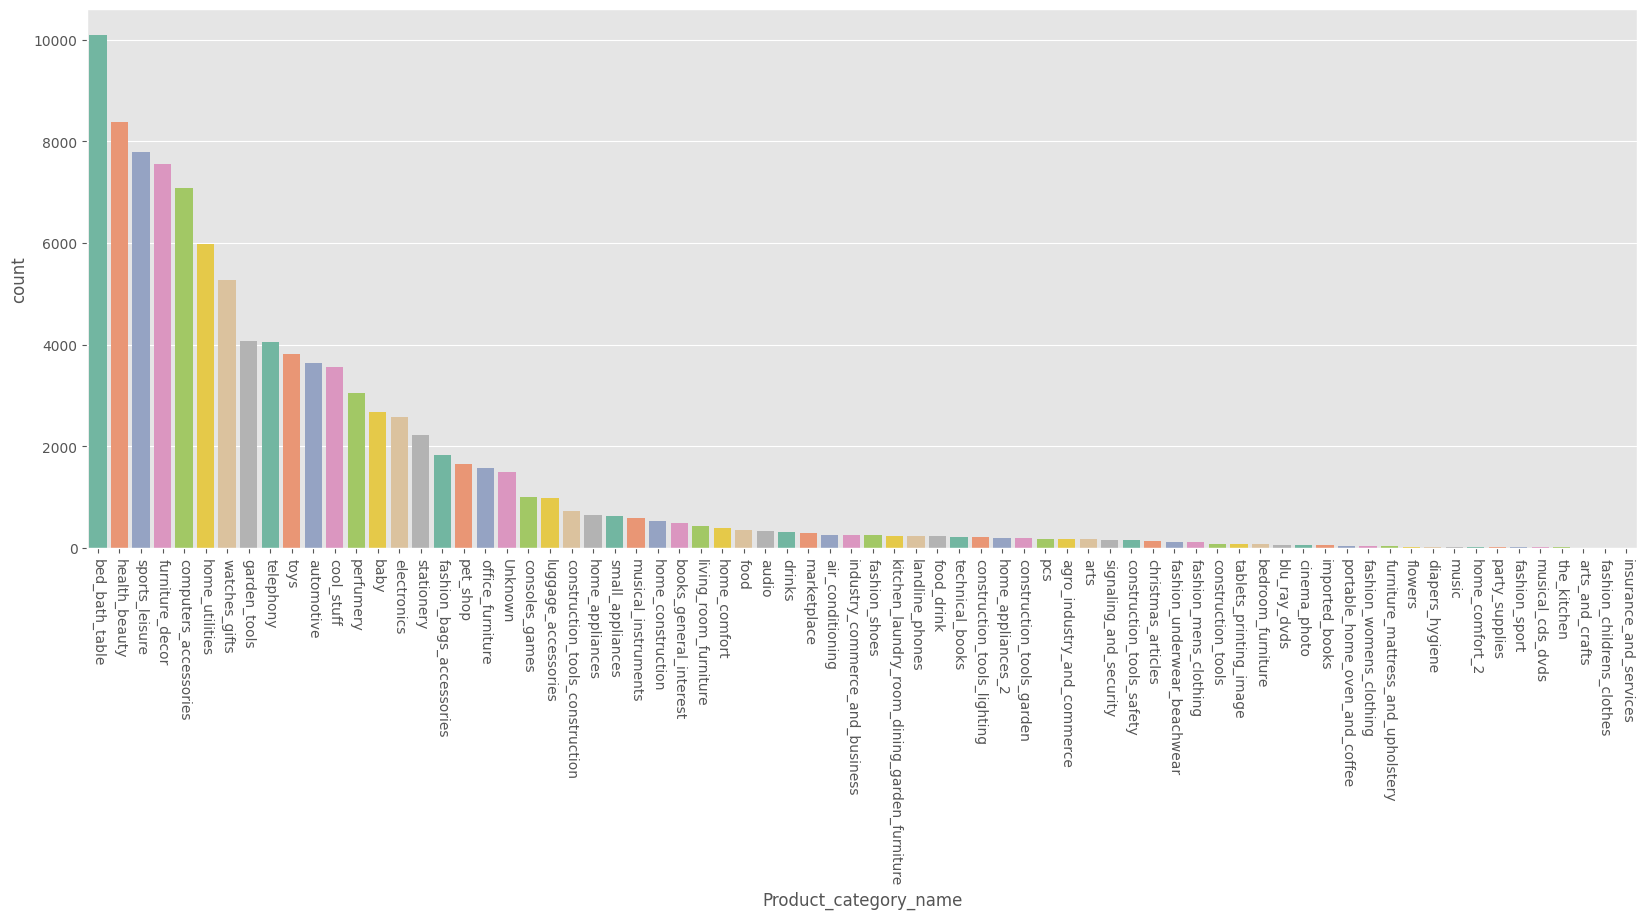

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(category,x="Product_category_name", y="count", palette="Set2")
plt.xticks(rotation=270)
plt.show()

### 카테고리별 주문 건수

In [ ]:
order_product = pd.merge(order_items, product, how="left", on="Product_id")
order_product = order_product[["Order_id","Product_category_name", "Price"]]
unique_order_product = order_product.drop_duplicates("Order_id")
unique_order_product

,Order_id,Product_category_name,Price
0,ORDER_75477,cool_stuff,58.90
1,ORDER_63604,pet_shop,239.90
2,ORDER_05566,furniture_decor,199.00
3,ORDER_04632,garden_tools,199.90
4,ORDER_61452,home_utilities,21.90
...,...,...,...
100545,ORDER_70405,home_utilities,299.99
100546,ORDER_62069,computers_accessories,350.00
100547,ORDER_46632,sports_leisure,99.90
100548,ORDER_52966,computers_accessories,55.99


In [ ]:
unique_order_cat = unique_order_product.groupby("Product_category_name")["Price"].agg(["count","sum"]).sort_values("count", ascending=False).reset_index()
unique_order_cat

,Product_category_name,count,sum
0,bed_bath_table,8457,815293.55
1,health_beauty,7613,1017295.66
2,sports_leisure,6926,818737.07
3,computers_accessories,5988,708153.36
4,furniture_decor,5757,536433.21
...,...,...,...
67,musical_cds_dvds,12,640.00
68,the_kitchen,12,1890.99
69,arts_and_crafts,9,583.17
70,fashion_childrens_clothes,7,519.95


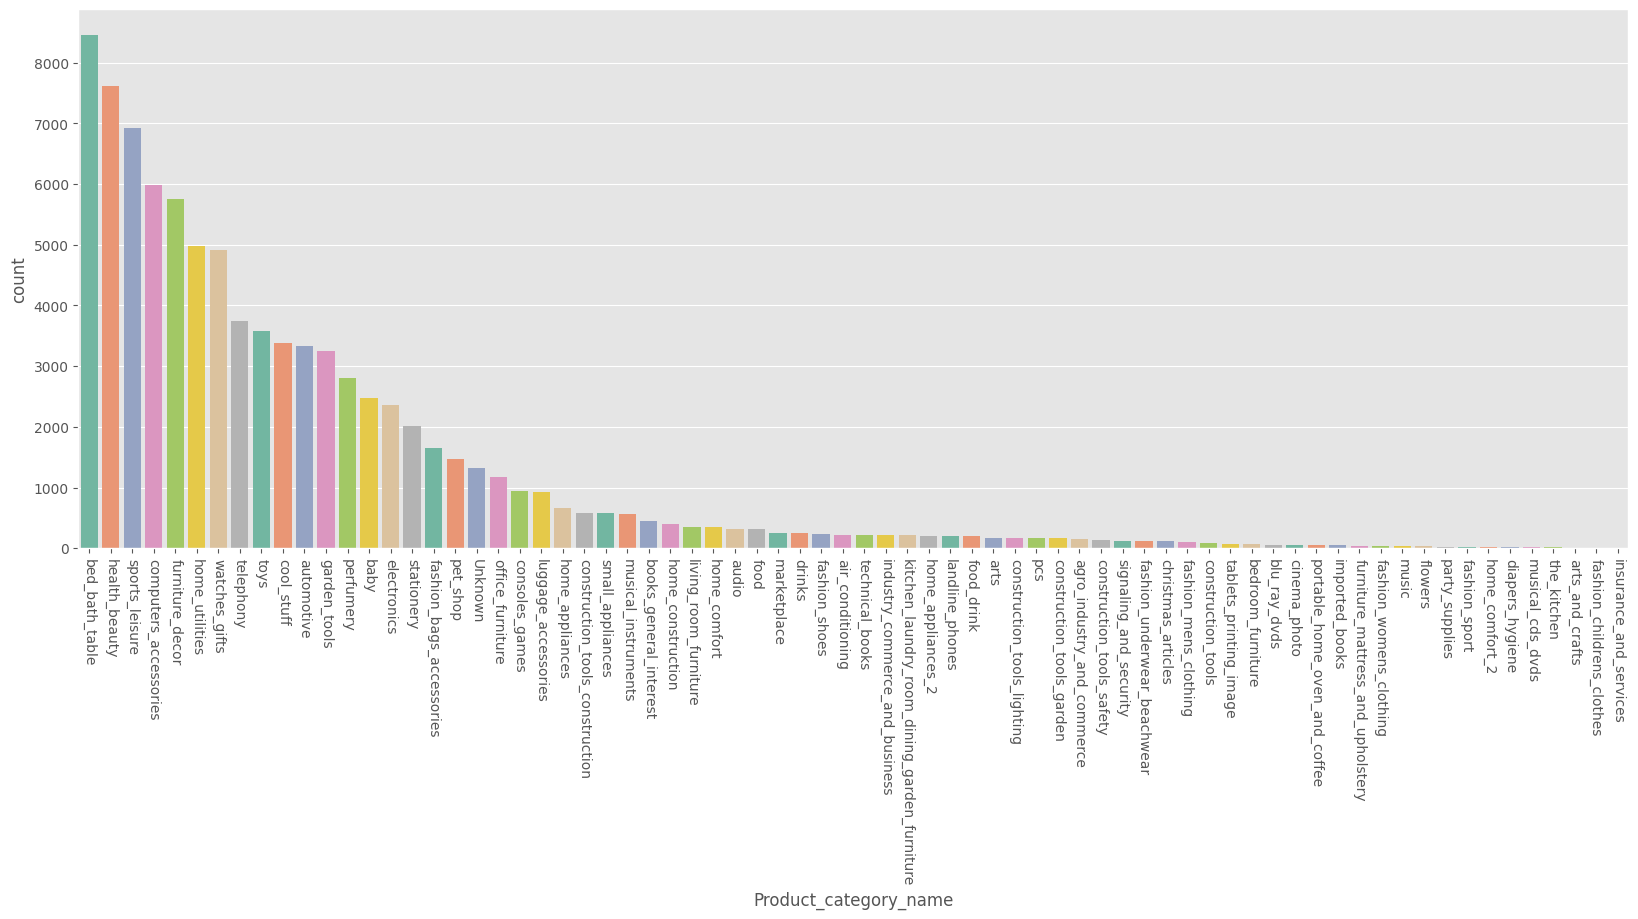

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(unique_order_cat,x="Product_category_name", y="count", palette="Set2")
plt.xticks(rotation=270)
plt.show()

### 주문 건수와 매출액


In [ ]:
orders["Purchase_year_month"] = pd.to_datetime(orders["Order_purchase_timestamp"]).dt.strftime("%Y-%m")
orders["Purchase_year_month_day"] = pd.to_datetime(orders["Order_purchase_timestamp"]).dt.strftime("%Y-%m-%d")
orders["Purchase_month"] = pd.to_datetime(orders["Order_purchase_timestamp"]).dt.strftime("%m")
orders["purchase_day"] = pd.to_datetime(orders["Order_purchase_timestamp"]).dt.day_name()
order_price_sum = order_items.groupby("Order_id")["Price"].agg(["sum"]).reset_index()
orders = pd.merge(order_price_sum, orders, on="Order_id", how="left")
orders.rename(columns={"sum": "Total_Revenue"}, inplace=True)
orders

,Order_id,Total_Revenue,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Purchase_year_month,Purchase_year_month_day,Purchase_month,purchase_day
0,ORDER_00000,29.99,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,2018-10,2018-10-02,10,Tuesday
1,ORDER_00001,45.00,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,2018-11,2018-11-18,11,Sunday
2,ORDER_00002,19.90,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2019-02,2019-02-13,02,Wednesday
3,ORDER_00003,147.90,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,2018-07,2018-07-09,07,Monday
4,ORDER_00004,59.99,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,2018-05,2018-05-16,05,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
87943,ORDER_88083,72.00,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,2018-03,2018-03-09,03,Friday
87944,ORDER_88084,174.90,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,2019-02,2019-02-06,02,Wednesday
87945,ORDER_88085,205.99,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,2018-08,2018-08-27,08,Monday
87946,ORDER_88086,359.98,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,2019-01,2019-01-08,01,Tuesday


#### 년-월 주문 건수와 판매액

In [ ]:
orders.groupby("Purchase_year_month")["Order_id"].count().sort_values(ascending=False)

Purchase_year_month
2018-11    7288
2019-01    7069
2019-03    7003
2019-04    6790
2019-05    6717
2019-02    6554
2019-06    6024
2018-12    5513
2018-10    4478
2018-08    4191
2018-09    4149
2019-07    4137
2018-07    3861
2018-05    3544
2018-06    3134
2018-03    2545
2018-04    2303
2018-02    1639
2018-01     747
2017-10     261
2017-12       1
Name: Order_id, dtype: int64

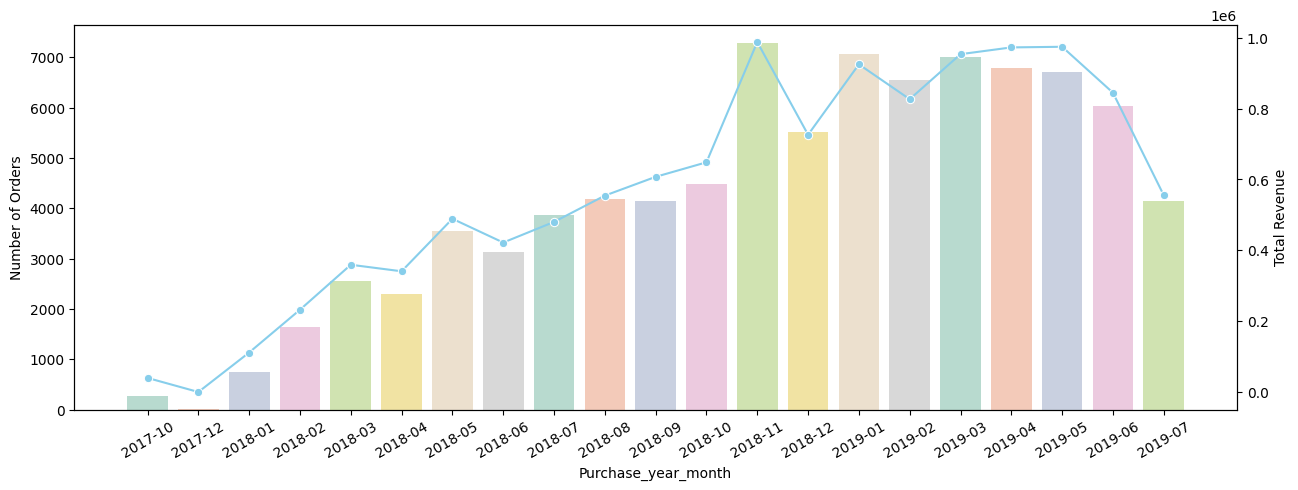

In [ ]:
plt.style.use('default')

fig, ax1 = plt.subplots(figsize=(15,5))

sns.barplot(orders.groupby("Purchase_year_month")["Order_id"].count(), ax=ax1, palette="Set2", alpha = 0.5)

plt.xticks(rotation=30)

ax2 = plt.twinx()
sns.lineplot(orders.groupby("Purchase_year_month")["Total_Revenue"].sum(), ax = ax2, color = "skyblue", marker = "o")

ax1.set_ylabel('Number of Orders')
ax2.set_ylabel("Total Revenue")

plt.xticks(rotation=30)
plt.show()

#### 년-월-일 주문 건수

In [ ]:
orders.groupby("Purchase_year_month_day")["Order_id"].count().sort_values(ascending=False)

Purchase_year_month_day
2018-11-24    1147
2018-11-25     487
2018-11-27     395
2018-11-26     382
2018-11-28     371
              ... 
2018-01-09       5
2018-01-08       4
2018-01-07       4
2018-01-06       4
2017-12-23       1
Name: Order_id, Length: 581, dtype: int64

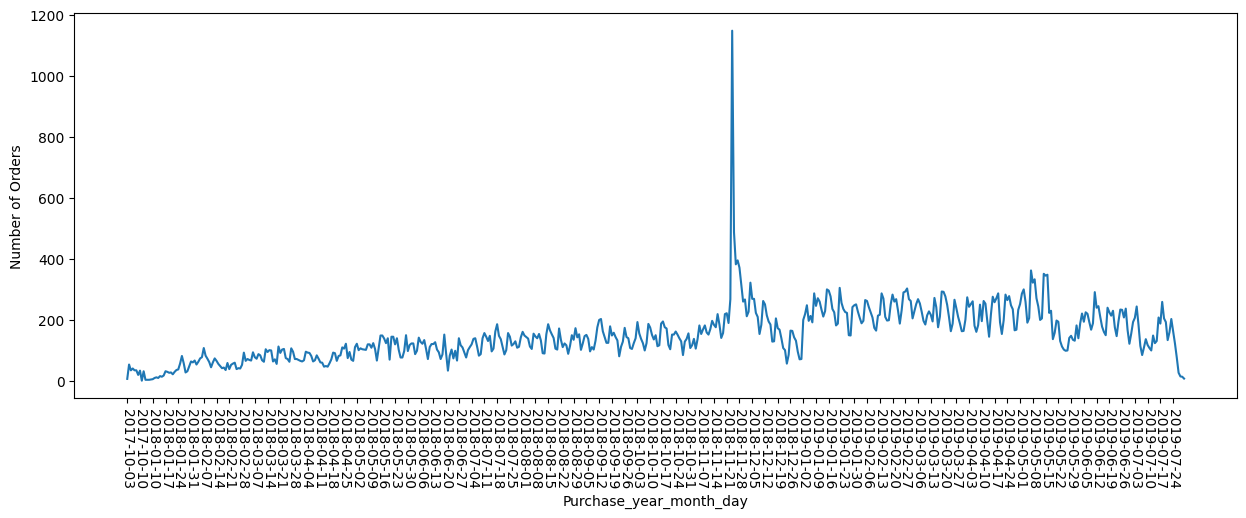

In [ ]:
# 주문 건수
plt.style.use("default")

plt.figure(figsize=(15,5))
sns.lineplot(orders.groupby("Purchase_year_month_day")["Order_id"].count())
plt.gca().set_xticks(plt.gca().get_xticks()[::7])
plt.ylabel('Number of Orders')
plt.xticks(rotation=270)
plt.show()

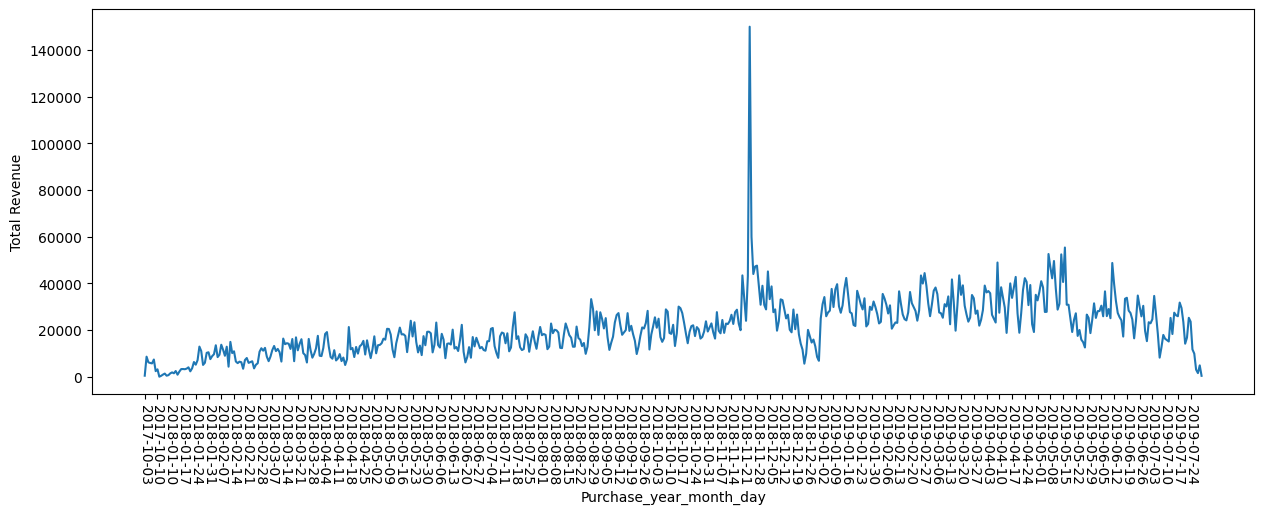

In [ ]:
# 매출액
plt.style.use("default")

plt.figure(figsize=(15,5))
sns.lineplot(orders.groupby("Purchase_year_month_day")["Total_Revenue"].sum())
plt.gca().set_xticks(plt.gca().get_xticks()[::7])
plt.ylabel('Total Revenue')
plt.xticks(rotation=270)
plt.show()

#### 월별 주문 건수 와 판매액 (2017-9 ~ 2019-07)

In [ ]:
orders.groupby("Purchase_month")["Order_id"].count().sort_values(ascending=False)

Purchase_month
05    10261
03     9548
06     9158
04     9093
02     8193
07     7998
01     7816
11     7288
12     5514
10     4739
08     4191
09     4149
Name: Order_id, dtype: int64

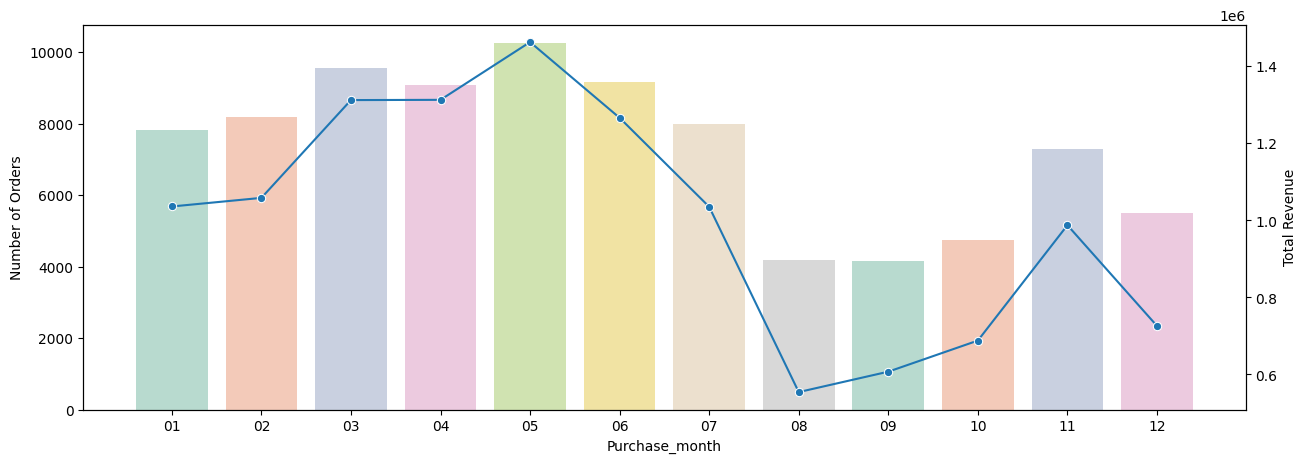

In [ ]:
plt.style.use("default")

fig, ax1 = plt.subplots(figsize=(15, 5))
sns.barplot(orders.groupby("Purchase_month")["Order_id"].count(), palette="Set2", alpha = 0.5, ax=ax1)


ax2 = plt.twinx()
sns.lineplot(orders.groupby("Purchase_month")["Total_Revenue"].sum(), marker = "o", ax=ax2)

ax1.set_ylabel('Number of Orders')
ax2.set_ylabel("Total Revenue")

plt.show()

#### 요일별 주문 건수 와 판매액

In [ ]:
orders.groupby("purchase_day")["Order_id"].count().sort_values(ascending=False)

purchase_day
Tuesday      14310
Wednesday    14078
Thursday     13744
Friday       13037
Saturday     12516
Monday       10637
Sunday        9626
Name: Order_id, dtype: int64

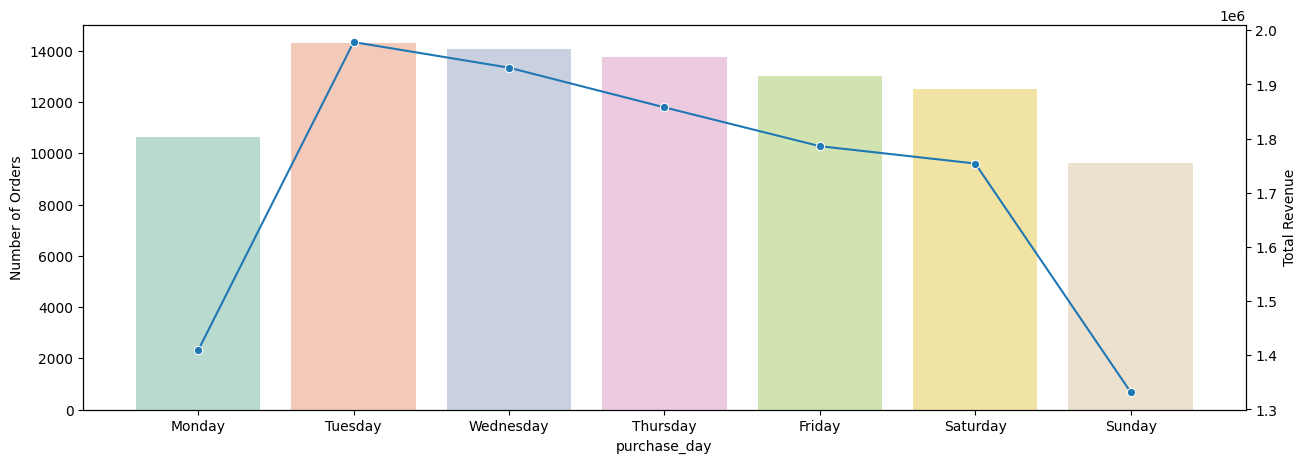

In [ ]:
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.style.use("default")

fig, ax1 = plt.subplots(figsize=(15,5))
sns.barplot(orders.groupby("purchase_day")["Order_id"].count().reindex(weekday), ax=ax1, palette="Set2", alpha=0.5)

ax2 = plt.twinx()
sns.lineplot(orders.groupby("purchase_day")["Total_Revenue"].sum().reindex(weekday), ax=ax2, marker = "o")

ax1.set_ylabel('Number of Orders')
ax2.set_ylabel("Total Revenue")

plt.show()

### 실제 배송 날짜와 기대 배송 날짜의 차이 와 배송에 걸린 시간

In [ ]:
orders["delivered_customer_only_date"] = pd.to_datetime(orders["Order_delivered_customer_date"]).dt.date
orders["Order_estimated_delivery_date"] = pd.to_datetime(orders["Order_estimated_delivery_date"]).dt.date
orders["deliver_estimate_diff"] = (orders["delivered_customer_only_date"] - orders["Order_estimated_delivery_date"])

orders["Purchase_year_month_day"] = pd.to_datetime(orders["Purchase_year_month_day"]).dt.date
orders["delivery_time"] = (orders["delivered_customer_only_date"] - orders["Purchase_year_month_day"])

In [ ]:
import datetime
orders["deliver_estimate_diff_num"] = 0
orders["delivery_time_num"] = 0

# date_diff 열을 순회하면서 값이 0인 경우에는 "order_diff_num" 열에 0을, 그 외의 경우에는 일 수만 추출하여 저장
for i, d in enumerate(orders["deliver_estimate_diff"]):
    if d != datetime.timedelta(days=0):
        orders.at[i, "deliver_estimate_diff_num"] = int(str(d).split()[0])

for i, d in enumerate(orders["delivery_time"]):
    if d != datetime.timedelta(days=0):
        orders.at[i, "delivery_time_num"] = int(str(d).split()[0])
orders

,Order_id,Total_Revenue,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Purchase_year_month,Purchase_year_month_day,Purchase_month,purchase_day,delivered_customer_only_date,deliver_estimate_diff,delivery_time,deliver_estimate_diff_num,delivery_time_num
0,ORDER_00000,29.99,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,2018-10,2018-10-02,10,Tuesday,2018-10-10,"-8 days, 0:00:00","8 days, 0:00:00",-8,8
1,ORDER_00001,45.00,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,2018-11,2018-11-18,11,Sunday,2018-12-02,"-13 days, 0:00:00","14 days, 0:00:00",-13,14
2,ORDER_00002,19.90,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2019-02,2019-02-13,02,Wednesday,2019-02-16,"-10 days, 0:00:00","3 days, 0:00:00",-10,3
3,ORDER_00003,147.90,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,2018-07,2018-07-09,07,Monday,2018-07-26,"-6 days, 0:00:00","17 days, 0:00:00",-6,17
4,ORDER_00004,59.99,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,2018-05,2018-05-16,05,Wednesday,2018-05-26,"-12 days, 0:00:00","10 days, 0:00:00",-12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87943,ORDER_88083,72.00,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,2018-03,2018-03-09,03,Friday,2018-03-17,"-11 days, 0:00:00","8 days, 0:00:00",-11,8
87944,ORDER_88084,174.90,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,2019-02,2019-02-06,02,Wednesday,2019-02-28,"-2 days, 0:00:00","22 days, 0:00:00",-2,22
87945,ORDER_88085,205.99,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,2018-08,2018-08-27,08,Monday,2018-09-21,"-6 days, 0:00:00","25 days, 0:00:00",-6,25
87946,ORDER_88086,359.98,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,2019-01,2019-01-08,01,Tuesday,2019-01-25,"-21 days, 0:00:00","17 days, 0:00:00",-21,17


In [ ]:
review_avg = review.groupby("Order_id")["Review_score"].agg(["mean"]).reset_index()
review_avg.rename(columns={"mean":"review_mean"}, inplace=True)
review_avg

,Order_id,review_mean
0,ORDER_00000,4.0
1,ORDER_00001,5.0
2,ORDER_00002,5.0
3,ORDER_00003,4.0
4,ORDER_00004,5.0
...,...,...
87338,ORDER_88083,5.0
87339,ORDER_88084,4.0
87340,ORDER_88085,5.0
87341,ORDER_88086,2.0


In [ ]:
# order_items에 없던 Order_id로 위에서 Order와 Order_items 합칠때 사라짐
review_avg[~review_avg["Order_id"].isin(orders["Order_id"])]

,Order_id,review_mean
26968,ORDER_27185,1.0


In [ ]:
review_avg.drop(review_avg[review_avg["Order_id"]=="ORDER_27185"].index, inplace=True)

In [ ]:
review_order_time = pd.merge(review_avg,  orders, on="Order_id", how="left")
review_order_time

,Order_id,review_mean,Total_Revenue,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Purchase_year_month,Purchase_year_month_day,Purchase_month,purchase_day,delivered_customer_only_date,deliver_estimate_diff,delivery_time,deliver_estimate_diff_num,delivery_time_num
0,ORDER_00000,4.0,29.99,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,2018-10,2018-10-02,10,Tuesday,2018-10-10,"-8 days, 0:00:00","8 days, 0:00:00",-8,8
1,ORDER_00001,5.0,45.00,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,2018-11,2018-11-18,11,Sunday,2018-12-02,"-13 days, 0:00:00","14 days, 0:00:00",-13,14
2,ORDER_00002,5.0,19.90,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2019-02,2019-02-13,02,Wednesday,2019-02-16,"-10 days, 0:00:00","3 days, 0:00:00",-10,3
3,ORDER_00003,4.0,147.90,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,2018-07,2018-07-09,07,Monday,2018-07-26,"-6 days, 0:00:00","17 days, 0:00:00",-6,17
4,ORDER_00004,5.0,59.99,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,2018-05,2018-05-16,05,Wednesday,2018-05-26,"-12 days, 0:00:00","10 days, 0:00:00",-12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87337,ORDER_88083,5.0,72.00,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,2018-03,2018-03-09,03,Friday,2018-03-17,"-11 days, 0:00:00","8 days, 0:00:00",-11,8
87338,ORDER_88084,4.0,174.90,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,2019-02,2019-02-06,02,Wednesday,2019-02-28,"-2 days, 0:00:00","22 days, 0:00:00",-2,22
87339,ORDER_88085,5.0,205.99,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,2018-08,2018-08-27,08,Monday,2018-09-21,"-6 days, 0:00:00","25 days, 0:00:00",-6,25
87340,ORDER_88086,2.0,359.98,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,2019-01,2019-01-08,01,Tuesday,2019-01-25,"-21 days, 0:00:00","17 days, 0:00:00",-21,17


#### 실제 배송 날짜와 기대 배송 날짜에 따른 평점
더 빠르게 도착한 것 => 음수

1-7일 1주일 유예기간

8일보다 더 늦게 도착

In [ ]:
review_order_time.loc[review_order_time["deliver_estimate_diff_num"]<=0, "deliver_estimate_diff_cat"] = "faster or on time"
review_order_time.loc[(review_order_time['deliver_estimate_diff_num'] > 0) & (review_order_time['deliver_estimate_diff_num'] <= 3), 'deliver_estimate_diff_cat'] = '3 days buffer'
review_order_time.loc[review_order_time['deliver_estimate_diff_num'] > 3, 'deliver_estimate_diff_cat'] = 'over 3 days'
review_order_time


,Order_id,review_mean,Total_Revenue,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Purchase_year_month,Purchase_year_month_day,Purchase_month,purchase_day,delivered_customer_only_date,deliver_estimate_diff,delivery_time,deliver_estimate_diff_num,delivery_time_num,deliver_estimate_diff_cat,delivery_time_cat
0,ORDER_00000,4.0,29.99,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,2018-10,2018-10-02,10,Tuesday,2018-10-10,"-8 days, 0:00:00","8 days, 0:00:00",-8,8,faster or on time,under 24
1,ORDER_00001,5.0,45.00,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,2018-11,2018-11-18,11,Sunday,2018-12-02,"-13 days, 0:00:00","14 days, 0:00:00",-13,14,faster or on time,under 24
2,ORDER_00002,5.0,19.90,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2019-02,2019-02-13,02,Wednesday,2019-02-16,"-10 days, 0:00:00","3 days, 0:00:00",-10,3,faster or on time,under 24
3,ORDER_00003,4.0,147.90,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,2018-07,2018-07-09,07,Monday,2018-07-26,"-6 days, 0:00:00","17 days, 0:00:00",-6,17,faster or on time,under 24
4,ORDER_00004,5.0,59.99,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,2018-05,2018-05-16,05,Wednesday,2018-05-26,"-12 days, 0:00:00","10 days, 0:00:00",-12,10,faster or on time,under 24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87337,ORDER_88083,5.0,72.00,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,2018-03,2018-03-09,03,Friday,2018-03-17,"-11 days, 0:00:00","8 days, 0:00:00",-11,8,faster or on time,under 24
87338,ORDER_88084,4.0,174.90,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,2019-02,2019-02-06,02,Wednesday,2019-02-28,"-2 days, 0:00:00","22 days, 0:00:00",-2,22,faster or on time,under 24
87339,ORDER_88085,5.0,205.99,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,2018-08,2018-08-27,08,Monday,2018-09-21,"-6 days, 0:00:00","25 days, 0:00:00",-6,25,faster or on time,over 24
87340,ORDER_88086,2.0,359.98,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,2019-01,2019-01-08,01,Tuesday,2019-01-25,"-21 days, 0:00:00","17 days, 0:00:00",-21,17,faster or on time,under 24


In [ ]:
review_order_time.groupby("deliver_estimate_diff_cat")["review_mean"].mean().sort_values(ascending=False)

deliver_estimate_diff_cat
faster or on time    4.282647
3 days buffer        3.220607
over 3 days          1.827262
Name: review_mean, dtype: float64

<Axes: xlabel='deliver_estimate_diff_cat', ylabel='review_mean'>

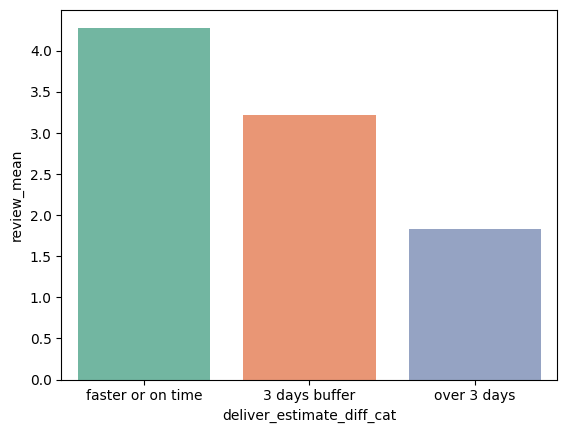

In [ ]:
sns.barplot(review_order_time.groupby("deliver_estimate_diff_cat")["review_mean"].mean().sort_values(ascending=False), palette="Set2")

#### 배송 시간에 따른 평점

In [ ]:
review_order_time.describe()

,review_mean,Total_Revenue,deliver_estimate_diff_num,delivery_time_num
count,87342.000000,87342.000000,87342.000000,87342.000000
mean,4.145339,136.807064,-12.260218,12.800943
std,1.290970,208.234129,10.131200,9.588923
min,1.000000,0.850000,-147.000000,0.000000
25%,4.000000,45.900000,-17.000000,7.000000
50%,5.000000,86.900000,-13.000000,11.000000
75%,5.000000,149.900000,-8.000000,16.000000
max,5.000000,13440.000000,175.000000,196.000000


In [ ]:
np.percentile(review_order_time["delivery_time_num"], 90)

24.0

In [ ]:
review_order_time.loc[review_order_time["delivery_time_num"]<24, "delivery_time_cat"] = "under 24"
review_order_time.loc[review_order_time['delivery_time_num'] >= 24, 'delivery_time_cat'] = 'over 24'

In [ ]:
review_order_time.groupby("delivery_time_cat")["review_mean"].mean()

delivery_time_cat
over 24     2.851665
under 24    4.289131
Name: review_mean, dtype: float64

<Axes: xlabel='delivery_time_cat', ylabel='review_mean'>

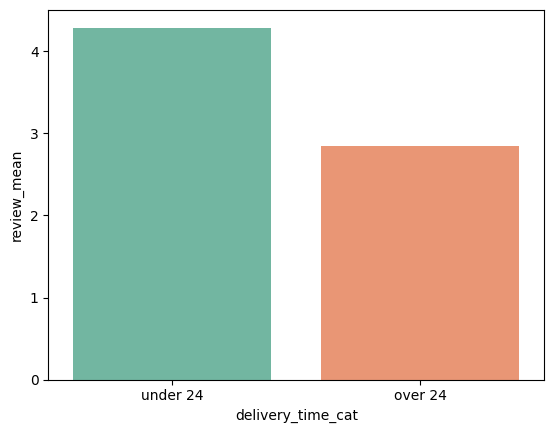

In [ ]:
sns.barplot(review_order_time.groupby("delivery_time_cat")["review_mean"].mean().sort_values(ascending=False), palette="Set2")

#### 카테고리에 따른 배송 시간과 주문 건수

In [ ]:
# 위에서 order_items하고 product 합친 것
order_product

,Order_id,Product_category_name,Price
0,ORDER_75477,cool_stuff,58.90
1,ORDER_63604,pet_shop,239.90
2,ORDER_05566,furniture_decor,199.00
3,ORDER_04632,garden_tools,199.90
4,ORDER_61452,home_utilities,21.90
...,...,...,...
100545,ORDER_70405,home_utilities,299.99
100546,ORDER_62069,computers_accessories,350.00
100547,ORDER_46632,sports_leisure,99.90
100548,ORDER_52966,computers_accessories,55.99


In [ ]:
category_delivery = pd.merge(review_order_time, order_product, on="Order_id", how="left")
category_delivery

,Order_id,review_mean,Total_Revenue,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Purchase_year_month,Purchase_year_month_day,Purchase_month,purchase_day,delivered_customer_only_date,deliver_estimate_diff,delivery_time,deliver_estimate_diff_num,delivery_time_num,deliver_estimate_diff_cat,delivery_time_cat,Product_category_name,Price
0,ORDER_00000,4.0,29.99,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,2018-10,2018-10-02,10,Tuesday,2018-10-10,"-8 days, 0:00:00","8 days, 0:00:00",-8,8,faster or on time,under 24,home_utilities,29.99
1,ORDER_00001,5.0,45.00,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,2018-11,2018-11-18,11,Sunday,2018-12-02,"-13 days, 0:00:00","14 days, 0:00:00",-13,14,faster or on time,under 24,pet_shop,45.00
2,ORDER_00002,5.0,19.90,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2019-02,2019-02-13,02,Wednesday,2019-02-16,"-10 days, 0:00:00","3 days, 0:00:00",-10,3,faster or on time,under 24,stationery,19.90
3,ORDER_00003,4.0,147.90,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,2018-07,2018-07-09,07,Monday,2018-07-26,"-6 days, 0:00:00","17 days, 0:00:00",-6,17,faster or on time,under 24,automotive,147.90
4,ORDER_00004,5.0,59.99,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,2018-05,2018-05-16,05,Wednesday,2018-05-26,"-12 days, 0:00:00","10 days, 0:00:00",-12,10,faster or on time,under 24,automotive,59.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99765,ORDER_88084,4.0,174.90,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,2019-02,2019-02-06,02,Wednesday,2019-02-28,"-2 days, 0:00:00","22 days, 0:00:00",-2,22,faster or on time,under 24,baby,174.90
99766,ORDER_88085,5.0,205.99,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,2018-08,2018-08-27,08,Monday,2018-09-21,"-6 days, 0:00:00","25 days, 0:00:00",-6,25,faster or on time,over 24,home_appliances_2,205.99
99767,ORDER_88086,2.0,359.98,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,2019-01,2019-01-08,01,Tuesday,2019-01-25,"-21 days, 0:00:00","17 days, 0:00:00",-21,17,faster or on time,under 24,computers_accessories,179.99
99768,ORDER_88086,2.0,359.98,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,2019-01,2019-01-08,01,Tuesday,2019-01-25,"-21 days, 0:00:00","17 days, 0:00:00",-21,17,faster or on time,under 24,computers_accessories,179.99


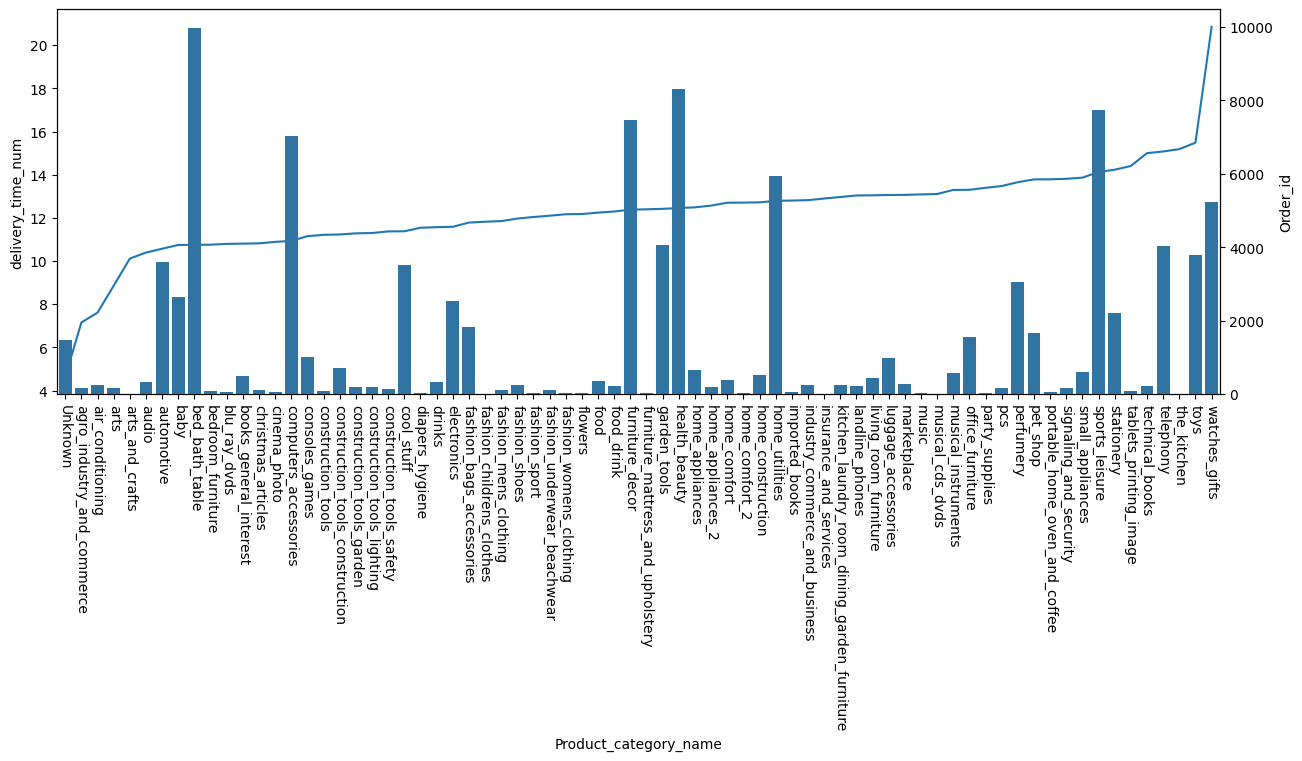

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,5))
sns.lineplot(category_delivery.groupby("Product_category_name")["delivery_time_num"].mean().sort_values(), ax=ax1)
plt.xticks(rotation=270)
ax2 = plt.twinx()
sns.barplot(category_delivery.groupby("Product_category_name")["Order_id"].count(), ax=ax2)



plt.show()

In [ ]:
category_delivery[category_delivery["delivery_time_num"]>=24].drop_duplicates("Order_id")

,Order_id,review_mean,Total_Revenue,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Purchase_year_month,Purchase_year_month_day,Purchase_month,purchase_day,delivered_customer_only_date,deliver_estimate_diff,delivery_time,deliver_estimate_diff_num,delivery_time_num,deliver_estimate_diff_cat,delivery_time_cat,Product_category_name,Price
21,ORDER_00021,2.0,109.90,CUSTOMER_30117,delivered,2019-02-20 23:46:53,2019-02-26 22:25:22,2019-03-21 22:03:54,2019-03-12,2019-02,2019-02-20,02,Wednesday,2019-03-21,"9 days, 0:00:00","29 days, 0:00:00",9,29,over 8 days,over 24,cool_stuff,109.90
26,ORDER_00025,4.0,30.10,CUSTOMER_20841,delivered,2019-02-25 13:50:30,2019-02-26 22:28:50,2019-03-27 23:29:14,2019-04-13,2019-02,2019-02-25,02,Monday,2019-03-27,"-17 days, 0:00:00","30 days, 0:00:00",-17,30,faster or on time,over 24,garden_tools,30.10
32,ORDER_00031,5.0,78.00,CUSTOMER_53861,delivered,2019-02-17 15:59:46,2019-02-20 23:03:56,2019-03-20 00:59:25,2019-03-20,2019-02,2019-02-17,02,Sunday,2019-03-20,0:00:00,"31 days, 0:00:00",0,31,faster or on time,over 24,garden_tools,78.00
38,ORDER_00037,1.0,339.00,CUSTOMER_60468,delivered,2018-11-24 21:27:48,2018-12-13 21:14:05,2018-12-28 18:59:23,2018-12-21,2018-11,2018-11-24,11,Saturday,2018-12-28,"7 days, 0:00:00","34 days, 0:00:00",7,34,over 8 days,over 24,home_utilities,339.00
52,ORDER_00050,1.0,45.98,CUSTOMER_46100,delivered,2019-03-09 14:50:15,2019-03-15 00:31:19,2019-04-03 13:28:46,2019-04-02,2019-03,2019-03-09,03,Saturday,2019-04-03,"1 day, 0:00:00","25 days, 0:00:00",1,25,7 days buffer,over 24,telephony,22.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99702,ORDER_88024,5.0,148.90,CUSTOMER_82296,delivered,2019-01-13 13:53:39,2019-01-20 00:13:00,2019-02-08 13:03:23,2019-02-19,2019-01,2019-01-13,01,Sunday,2019-02-08,"-11 days, 0:00:00","26 days, 0:00:00",-11,26,faster or on time,over 24,bed_bath_table,148.90
99744,ORDER_88064,5.0,113.00,CUSTOMER_38372,delivered,2019-02-07 12:09:45,2019-02-21 23:38:05,2019-03-05 18:56:39,2019-05-11,2019-02,2019-02-07,02,Thursday,2019-03-05,"-67 days, 0:00:00","26 days, 0:00:00",-67,26,faster or on time,over 24,sports_leisure,113.00
99750,ORDER_88070,1.0,36.90,CUSTOMER_02724,delivered,2018-10-12 20:54:11,2018-10-17 17:04:42,2018-11-21 17:06:59,2018-10-31,2018-10,2018-10-12,10,Friday,2018-11-21,"21 days, 0:00:00","40 days, 0:00:00",21,40,over 8 days,over 24,baby,36.90
99759,ORDER_88079,1.0,55.90,CUSTOMER_38893,delivered,2018-12-20 09:52:41,2018-12-20 20:25:25,2019-01-26 15:45:14,2019-01-18,2018-12,2018-12-20,12,Thursday,2019-01-26,"8 days, 0:00:00","37 days, 0:00:00",8,37,over 8 days,over 24,musical_instruments,55.90


### 구매자와 판매자의 주가 같은지 다른지에 따른 실제와 예상 배송시간의 차이

In [ ]:
order_customer = pd.merge(orders, customer, on="Customer_id", how="left")
order_customer

,Order_id,Total_Revenue,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Purchase_year_month,Purchase_year_month_day,Purchase_month,purchase_day,delivered_customer_only_date,deliver_estimate_diff,delivery_time,deliver_estimate_diff_num,delivery_time_num,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
0,ORDER_00000,29.99,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,2018-10,2018-10-02,10,Tuesday,2018-10-10,"-8 days, 0:00:00","8 days, 0:00:00",-8,8,CUSTOMER_Unique_60785,3149,sao paulo,SP
1,ORDER_00001,45.00,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,2018-11,2018-11-18,11,Sunday,2018-12-02,"-13 days, 0:00:00","14 days, 0:00:00",-13,14,CUSTOMER_Unique_52983,59296,sao goncalo do amarante,RN
2,ORDER_00002,19.90,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2019-02,2019-02-13,02,Wednesday,2019-02-16,"-10 days, 0:00:00","3 days, 0:00:00",-10,3,CUSTOMER_Unique_58227,9195,santo andre,SP
3,ORDER_00003,147.90,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,2018-07,2018-07-09,07,Monday,2018-07-26,"-6 days, 0:00:00","17 days, 0:00:00",-6,17,CUSTOMER_Unique_59164,86320,congonhinhas,PR
4,ORDER_00004,59.99,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,2018-05,2018-05-16,05,Wednesday,2018-05-26,"-12 days, 0:00:00","10 days, 0:00:00",-12,10,CUSTOMER_Unique_74753,26525,nilopolis,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87943,ORDER_88083,72.00,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,2018-03,2018-03-09,03,Friday,2018-03-17,"-11 days, 0:00:00","8 days, 0:00:00",-11,8,CUSTOMER_Unique_52545,12209,sao jose dos campos,SP
87944,ORDER_88084,174.90,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,2019-02,2019-02-06,02,Wednesday,2019-02-28,"-2 days, 0:00:00","22 days, 0:00:00",-2,22,CUSTOMER_Unique_67637,11722,praia grande,SP
87945,ORDER_88085,205.99,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,2018-08,2018-08-27,08,Monday,2018-09-21,"-6 days, 0:00:00","25 days, 0:00:00",-6,25,CUSTOMER_Unique_17508,45920,nova vicosa,BA
87946,ORDER_88086,359.98,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,2019-01,2019-01-08,01,Tuesday,2019-01-25,"-21 days, 0:00:00","17 days, 0:00:00",-21,17,CUSTOMER_Unique_14906,28685,japuiba,RJ


In [ ]:
order_customer_seller = pd.merge(order_customer, order_items.drop_duplicates("Order_id"), on="Order_id", how="left")
order_customer_seller_city = pd.merge(order_customer_seller, seller, on="Seller_id", how="left")
order_customer_seller_city= order_customer_seller_city[["Order_id", "Customer_id", "deliver_estimate_diff_num", "delivery_time_num", "Customer_zipcode_prefix", "Customer_city", "Customer_state", "Product_id", "Seller_id","Seller_zipcode_prefix","Seller_city","Seller_state"]]

In [ ]:
order_customer_seller_city.loc[order_customer_seller_city["Customer_state"]==order_customer_seller_city["Seller_state"], "State"] = "same"
order_customer_seller_city.loc[order_customer_seller_city["Customer_state"]!=order_customer_seller_city["Seller_state"], "State"] = "diff"

In [ ]:
order_customer_seller_city

,Order_id,Customer_id,deliver_estimate_diff_num,delivery_time_num,Customer_zipcode_prefix,Customer_city,Customer_state,Product_id,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state,State
0,ORDER_00000,CUSTOMER_62232,-8,8,3149,sao paulo,SP,PRODUCT_02093,SELLER_0491,9350,maua,SP,same
1,ORDER_00001,CUSTOMER_54059,-13,14,59296,sao goncalo do amarante,RN,PRODUCT_26747,SELLER_2662,31842,belo horizonte,MG,diff
2,ORDER_00002,CUSTOMER_59535,-10,3,9195,santo andre,SP,PRODUCT_10598,SELLER_1354,8752,mogi das cruzes,SP,same
3,ORDER_00003,CUSTOMER_60516,-6,17,86320,congonhinhas,PR,PRODUCT_16703,SELLER_1518,7112,guarulhos,SP,diff
4,ORDER_00004,CUSTOMER_76957,-12,10,26525,nilopolis,RJ,PRODUCT_08274,SELLER_1599,12940,atibaia,SP,diff
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87943,ORDER_88083,CUSTOMER_53611,-11,8,12209,sao jose dos campos,SP,PRODUCT_16488,SELLER_2296,12913,braganca paulista,SP,same
87944,ORDER_88084,CUSTOMER_69438,-2,22,11722,praia grande,SP,PRODUCT_01588,SELLER_0031,17602,tupa,SP,same
87945,ORDER_88085,CUSTOMER_17637,-6,25,45920,nova vicosa,BA,PRODUCT_13335,SELLER_1892,8290,sao paulo,SP,diff
87946,ORDER_88086,CUSTOMER_15001,-21,17,28685,japuiba,RJ,PRODUCT_07372,SELLER_2445,37175,ilicinea,MG,diff


<Axes: xlabel='deliver_estimate_diff_num', ylabel='Count'>

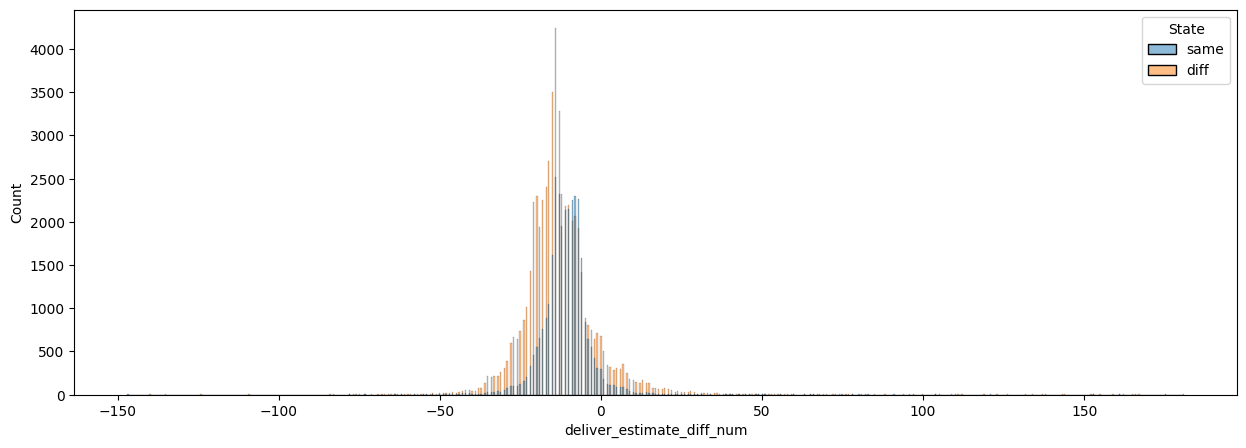

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(data= order_customer_seller_city,x="deliver_estimate_diff_num", hue="State")

In [ ]:
order_customer_seller_city.value_counts("State")

State
diff    56698
same    31250
Name: count, dtype: int64

In [ ]:
diff_over3 = order_customer_seller_city[(order_customer_seller_city["State"]=="diff")&(order_customer_seller_city["deliver_estimate_diff_num"]>3)]
same_over3 = order_customer_seller_city[(order_customer_seller_city["State"]=="same")&(order_customer_seller_city["deliver_estimate_diff_num"]>3)]
diff = order_customer_seller_city[(order_customer_seller_city["State"]=="diff")]
same = order_customer_seller_city[(order_customer_seller_city["State"]=="same")]
print("판매자와 구매자의 주가 다를 때 예상 시간보다 3일 늦은 경우: ", len(diff_over3) / len(diff) * 100, "%")
print("판매자와 구매자의 주가 같을 때 예상 시간보다 3일 늦은 경우: ", len(same_over3) / len(same) * 100, "%")

판매자와 구매자의 주가 다를 때 예상 시간보다 3일 늦은 경우:  6.282408550566157 %
판매자와 구매자의 주가 같을 때 예상 시간보다 3일 늦은 경우:  2.4416 %


In [ ]:
order_customer_seller_city[(order_customer_seller_city["State"]=="diff")&(order_customer_seller_city["deliver_estimate_diff_num"]>3)]

,Order_id,Customer_id,deliver_estimate_diff_num,delivery_time_num,Customer_zipcode_prefix,Customer_city,Customer_state,Product_id,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state,State
21,ORDER_00021,CUSTOMER_30117,9,29,21715,rio de janeiro,RJ,PRODUCT_16627,SELLER_1967,9220,santo andre,SP,diff
37,ORDER_00037,CUSTOMER_60468,7,34,19400,presidente venceslau,SP,PRODUCT_23726,SELLER_1855,89165,rio do sul,SC,diff
86,ORDER_00086,CUSTOMER_63341,17,36,20740,rio de janeiro,RJ,PRODUCT_04985,SELLER_2194,14940,ibitinga,SP,diff
96,ORDER_00096,CUSTOMER_62440,32,56,24933,marica,RJ,PRODUCT_19432,SELLER_1252,5734,sao paulo,SP,diff
100,ORDER_00100,CUSTOMER_47839,32,55,25540,sao joao de meriti,RJ,PRODUCT_05369,SELLER_2194,14940,ibitinga,SP,diff
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87737,ORDER_87876,CUSTOMER_11617,4,22,27332,barra mansa,RJ,PRODUCT_26758,SELLER_0140,3186,sao paulo,SP,diff
87768,ORDER_87908,CUSTOMER_60889,6,26,24450,sao goncalo,RJ,PRODUCT_27081,SELLER_0417,15025,sao jose do rio preto,SP,diff
87769,ORDER_87909,CUSTOMER_83310,4,21,39803,teofilo otoni,MG,PRODUCT_23833,SELLER_1066,8320,sao paulo,SP,diff
87792,ORDER_87932,CUSTOMER_87014,16,47,57035,maceio,AL,PRODUCT_22018,SELLER_0574,3126,sao paulo,SP,diff


In [ ]:
order_customer_seller_city[(order_customer_seller_city["State"]=="same")&(order_customer_seller_city["deliver_estimate_diff_num"]>3)]

,Order_id,Customer_id,deliver_estimate_diff_num,delivery_time_num,Customer_zipcode_prefix,Customer_city,Customer_state,Product_id,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state,State
17,ORDER_00017,CUSTOMER_01621,11,21,4001,sao paulo,SP,PRODUCT_08529,SELLER_2031,4438,sao paulo,SP,same
51,ORDER_00051,CUSTOMER_74336,7,24,13068,campinas,SP,PRODUCT_05119,SELLER_0556,14940,ibitinga,SP,same
285,ORDER_00285,CUSTOMER_40642,7,27,30130,belo horizonte,MG,PRODUCT_23617,SELLER_1798,35530,claudio,MG,same
351,ORDER_00351,CUSTOMER_27150,5,13,2358,sao paulo,SP,PRODUCT_25438,SELLER_0324,5729,sao paulo,SP,same
448,ORDER_00448,CUSTOMER_02225,4,29,4944,sao paulo,SP,PRODUCT_13027,SELLER_1518,7112,guarulhos,SP,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87616,ORDER_87755,CUSTOMER_59767,6,22,11095,santos,SP,PRODUCT_07700,SELLER_1289,14910,tabatinga,SP,same
87627,ORDER_87766,CUSTOMER_66747,8,23,13504,rio claro,SP,PRODUCT_13508,SELLER_1289,14910,tabatinga,SP,same
87637,ORDER_87776,CUSTOMER_20205,15,31,9911,diadema,SP,PRODUCT_05271,SELLER_1512,13145,paulinia,SP,same
87720,ORDER_87859,CUSTOMER_19014,5,18,30535,belo horizonte,MG,PRODUCT_25649,SELLER_2347,31140,belo horizonte,MG,same


<Axes: xlabel='deliver_estimate_diff_num', ylabel='Count'>

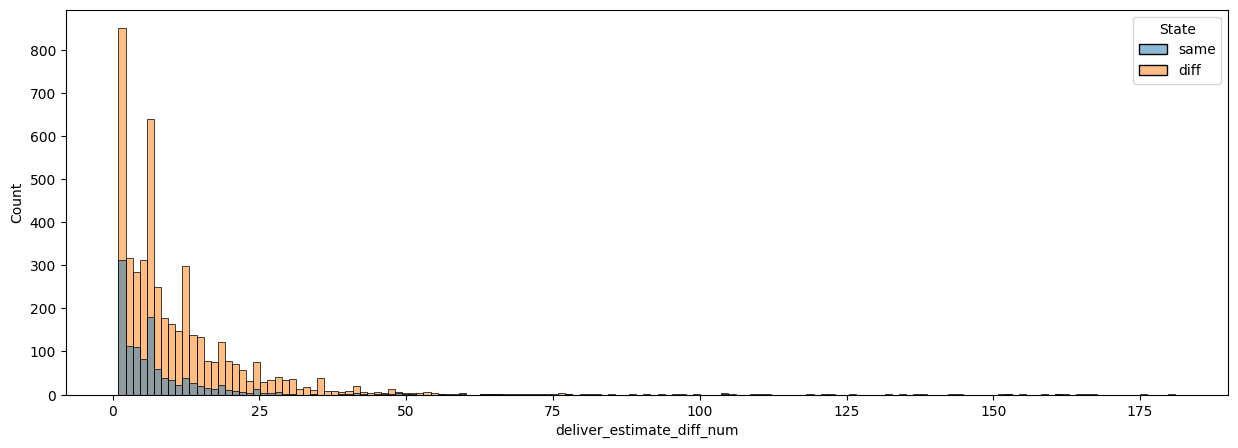

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(data= order_customer_seller_city[order_customer_seller_city["deliver_estimate_diff_num"]>0],x="deliver_estimate_diff_num", hue="State")

#### 주가 같은지 다른지에 따른 배송시간

<Axes: xlabel='delivery_time_num', ylabel='Count'>

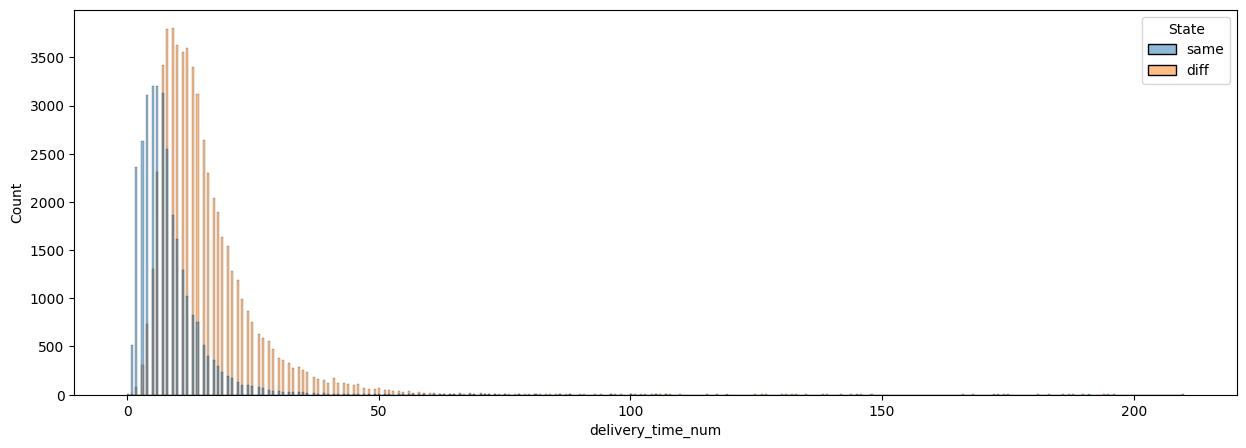

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(data= order_customer_seller_city,x="delivery_time_num", hue="State")

<Axes: xlabel='delivery_time_num', ylabel='Count'>

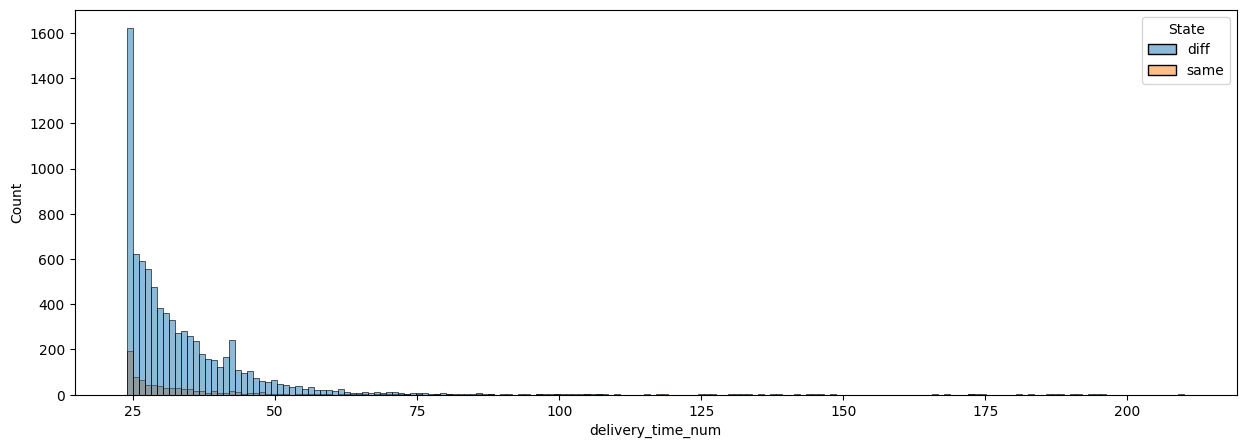

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(data= order_customer_seller_city[order_customer_seller_city["delivery_time_num"]>=24],x="delivery_time_num", hue="State")

In [ ]:
diff_over24 = order_customer_seller_city[(order_customer_seller_city["State"]=="diff")&(order_customer_seller_city["delivery_time_num"]>=24)]
same_over24 = order_customer_seller_city[(order_customer_seller_city["State"]=="same")&(order_customer_seller_city["delivery_time_num"]>=24)]
diff = order_customer_seller_city[(order_customer_seller_city["State"]=="diff")]
same = order_customer_seller_city[(order_customer_seller_city["State"]=="same")]
print("판매자와 구매자의 주가 다를 때 예상 시간보다 24일 늦은 경우: ", len(diff_over24) / len(diff) * 100, "%")
print("판매자와 구매자의 주가 같을 때 예상 시간보다 24일 늦은 경우: ", len(same_over24) / len(same) * 100, "%")

판매자와 구매자의 주가 다를 때 예상 시간보다 24일 늦은 경우:  14.333838936117676 %
판매자와 구매자의 주가 같을 때 예상 시간보다 24일 늦은 경우:  2.464 %


### 요일별 카테고리 => 월 일 구매ㅐ 건수, 매출 낮은 이유를 찾지 못함

In [ ]:
days_cat = pd.merge(order_product, orders, on="Order_id", how="left")
days_cat = days_cat[["Order_id","Product_category_name", "Customer_id", "purchase_day"]]
days_cat.head()

,Order_id,Product_category_name,Customer_id,purchase_day
0,ORDER_75477,cool_stuff,CUSTOMER_58023,Thursday
1,ORDER_63604,pet_shop,CUSTOMER_30341,Thursday
2,ORDER_05566,furniture_decor,CUSTOMER_30949,Monday
3,ORDER_04632,garden_tools,CUSTOMER_06713,Sunday
4,ORDER_61452,home_utilities,CUSTOMER_20396,Tuesday


In [ ]:
days_cat.groupby(["purchase_day", "Product_category_name"])["Product_category_name"].count().groupby(level=0, group_keys=False).nlargest(7)

purchase_day  Product_category_name
Friday        bed_bath_table           1463
              health_beauty            1295
              sports_leisure           1147
              furniture_decor          1127
              computers_accessories    1079
              home_utilities            899
              watches_gifts             793
Monday        bed_bath_table           1275
              health_beauty            1023
              furniture_decor           956
              sports_leisure            930
              home_utilities            761
              computers_accessories     672
              watches_gifts             658
Saturday      bed_bath_table           1410
              health_beauty            1169
              furniture_decor          1148
              sports_leisure           1044
              computers_accessories     992
              home_utilities            858
              watches_gifts             806
Sunday        bed_bath_table           1

In [ ]:
order_payment = pd.merge(orders, payments, on="Order_id", how="left")

In [ ]:
order_payment.groupby(["purchase_day", "Payment_type"])["Payment_type"].count()

purchase_day  Payment_type
Friday        boleto           2797
              credit_card      9895
              debit_card        175
              voucher           777
Monday        boleto           1692
              credit_card      8710
              debit_card        128
              voucher           538
Saturday      boleto           2544
              credit_card      9653
              debit_card        159
              voucher           740
Sunday        boleto           1551
              credit_card      7849
              debit_card        100
              voucher           566
Thursday      boleto           2885
              credit_card     10476
              debit_card        191
              voucher           837
Tuesday       boleto           3053
              credit_card     10863
              debit_card        185
              voucher           834
Wednesday     boleto           3077
              credit_card     10648
              debit_card        189
 

### seller state

<BarContainer object of 22 artists>

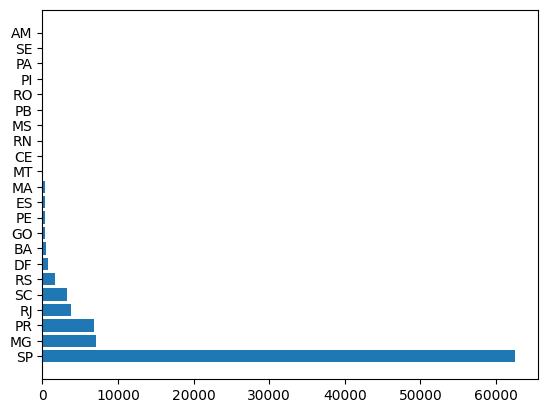

In [ ]:
plt.barh(order_customer_seller_city.value_counts("Seller_state").index, order_customer_seller_city.value_counts("Seller_state"))

<BarContainer object of 27 artists>

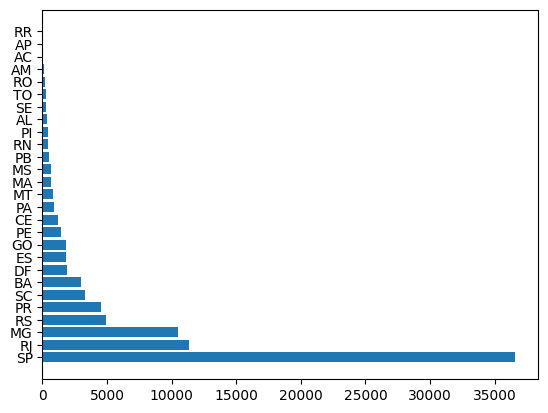

In [ ]:
plt.barh(order_customer_seller_city.value_counts("Customer_state").index, order_customer_seller_city.value_counts("Customer_state"))

### Category Seller

In [ ]:
seller_cat = pd.merge(order_product, order_customer_seller_city, on="Order_id", how="left")
seller_cat

,Order_id,Product_category_name,Price,Customer_id,deliver_estimate_diff_num,delivery_time_num,Customer_zipcode_prefix,Customer_city,Customer_state,Product_id,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state,State
0,ORDER_75477,cool_stuff,58.90,CUSTOMER_58023,-9,7,28013,campos dos goytacazes,RJ,PRODUCT_23128,SELLER_0452,27277,volta redonda,SP,diff
1,ORDER_63604,pet_shop,239.90,CUSTOMER_30341,-3,16,15775,santa fe do sul,SP,PRODUCT_24351,SELLER_0414,3471,sao paulo,SP,same
2,ORDER_05566,furniture_decor,199.00,CUSTOMER_30949,-14,8,35661,para de minas,MG,PRODUCT_20226,SELLER_1637,37564,borda da mata,MG,same
3,ORDER_04632,garden_tools,199.90,CUSTOMER_06713,-16,25,13226,varzea paulista,SP,PRODUCT_07878,SELLER_1445,87900,loanda,PR,diff
4,ORDER_61452,home_utilities,21.90,CUSTOMER_20396,-15,7,38017,uberaba,MG,PRODUCT_03505,SELLER_0581,14091,ribeirao preto,SP,diff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100545,ORDER_70405,home_utilities,299.99,CUSTOMER_78196,-8,17,65077,sao luis,MA,PRODUCT_04209,SELLER_2078,88303,itajai,SC,diff
100546,ORDER_62069,computers_accessories,350.00,CUSTOMER_23659,-9,9,81690,curitiba,PR,PRODUCT_08229,SELLER_1593,1206,sao paulo,SP,diff
100547,ORDER_46632,sports_leisure,99.90,CUSTOMER_01326,-13,5,4039,sao paulo,SP,PRODUCT_21462,SELLER_0528,80610,curitiba,PR,diff
100548,ORDER_52966,computers_accessories,55.99,CUSTOMER_50155,-9,2,13289,vinhedo,SP,PRODUCT_19978,SELLER_2563,4733,sao paulo,SP,same


In [ ]:
best_cat = ["bed_bath_table","health_beauty","sports_leisure","sports_leisure", "furniture_decor","computers_accessories"]
seller_cat[seller_cat["Product_category_name"].isin(best_cat)].groupby(["Product_category_name", "Seller_state"])["Seller_state"].count().groupby(level=0, group_keys=False).nlargest(5)

Product_category_name  Seller_state
bed_bath_table         SP              8941
                       SC               479
                       MG               317
                       RJ               131
                       PR               114
computers_accessories  SP              2998
                       PR              1498
                       MG              1431
                       RS               359
                       PE               348
furniture_decor        SP              5712
                       PR               996
                       MG               538
                       SC                98
                       RJ                97
health_beauty          SP              5561
                       RJ               948
                       PR               579
                       MG               363
                       MA               291
sports_leisure         SP              4906
                       PR              1

In [ ]:
# sp, sc, mg, rj, pr,/ rs, pe, / ma /

In [ ]:
best_cat = ["bed_bath_table","health_beauty","sports_leisure","sports_leisure", "furniture_decor","computers_accessories"]
seller_cat[seller_cat["Product_category_name"].isin(best_cat)].groupby(["Product_category_name", "Customer_state"])["Customer_state"].count().groupby(level=0, group_keys=False).nlargest(5)

Product_category_name  Customer_state
bed_bath_table         SP                4679
                       RJ                1493
                       MG                1228
                       RS                 574
                       PR                 431
computers_accessories  SP                2845
                       MG                 913
                       RJ                 904
                       RS                 455
                       PR                 350
furniture_decor        SP                3192
                       RJ                 983
                       MG                 874
                       RS                 506
                       PR                 469
health_beauty          SP                3623
                       MG                 958
                       RJ                 930
                       RS                 385
                       PR                 365
sports_leisure         SP                3

In [ ]:
# sp, rj, mg, rs, pr

### 뭔가 하는중

In [ ]:
# A 지역에 a물품을 구매한 customer 수와 a물품을 판매하는 seller 수

In [ ]:
seller_cat.groupby(["Customer_state","Product_category_name"])["Order_id"].count()

Customer_state  Product_category_name 
AC              Unknown                    2
                automotive                 4
                baby                       3
                bed_bath_table             4
                books_general_interest     2
                                          ..
TO              stationery                 3
                technical_books            2
                telephony                 18
                toys                      12
                watches_gifts             25
Name: Order_id, Length: 1356, dtype: int64

### Seller의 위치 파악

In [ ]:
seller_pro_id = pd.merge(order_items, seller, on="Seller_id", how="left")

In [ ]:
product_seller = pd.merge(product, seller_pro_id, on="Product_id", how="left")
seller_category = product_seller.groupby(["Seller_id","Product_category_name"])["Product_id"].agg(["count"]).reset_index()
seller_category = seller_category.drop(columns=["count"])

In [ ]:
seller_category

,Seller_id,Product_category_name
0,SELLER_0000,sports_leisure
1,SELLER_0001,fashion_bags_accessories
2,SELLER_0001,luggage_accessories
3,SELLER_0001,stationery
4,SELLER_0002,electronics
...,...,...
5848,SELLER_2759,cool_stuff
5849,SELLER_2760,cool_stuff
5850,SELLER_2760,sports_leisure
5851,SELLER_2761,Unknown


In [ ]:
zip_loc_mean = location.groupby("Geolocation_zipcode_prefix")[["Geolocation_lat","Geolocation_lng"]].agg("mean").reset_index()
zip_loc_mean

,Geolocation_zipcode_prefix,Geolocation_lat,Geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343766,-51.874689
19013,99980,-28.389129,-51.843836


In [ ]:
zip_loc_median = location.groupby("Geolocation_zipcode_prefix")[["Geolocation_lat","Geolocation_lng"]].agg("median").reset_index()
zip_loc_median

,Geolocation_zipcode_prefix,Geolocation_lat,Geolocation_lng
0,1001,-23.550381,-46.634027
1,1002,-23.548551,-46.635072
2,1003,-23.548977,-46.635313
3,1004,-23.549535,-46.634771
4,1005,-23.549612,-46.636532
...,...,...,...
19010,99960,-27.953797,-52.029641
19011,99965,-28.179542,-52.035551
19012,99970,-28.343273,-51.873734
19013,99980,-28.388092,-51.846880


In [ ]:
seller_loc = pd.merge(seller, zip_loc_median, left_on="Seller_zipcode_prefix", right_on = "Geolocation_zipcode_prefix", how="left")
seller_loc

,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state,Geolocation_zipcode_prefix,Geolocation_lat,Geolocation_lng
0,SELLER_0000,13023,campinas,SP,13023.0,-22.894561,-47.062380
1,SELLER_0001,13844,mogi guacu,SP,13844.0,-22.382440,-46.947605
2,SELLER_0002,12914,braganca paulista,SP,12914.0,-22.964436,-46.535090
3,SELLER_0003,20920,rio de janeiro,RJ,20920.0,-22.894692,-43.232735
4,SELLER_0004,55325,brejao,PE,55325.0,-9.024839,-36.570200
...,...,...,...,...,...,...,...
2758,SELLER_2758,87111,sarandi,PR,87111.0,-23.448778,-51.869229
2759,SELLER_2759,88137,palhoca,SC,88137.0,-27.626457,-48.673749
2760,SELLER_2760,4650,sao paulo,SP,4650.0,-23.657838,-46.677462
2761,SELLER_2761,96080,pelotas,RS,96080.0,-31.751451,-52.323899


In [ ]:
sell_cat_loc = pd.merge(seller_category, seller_loc, on="Seller_id", how="left")
sell_cat_loc.drop(columns=["Geolocation_zipcode_prefix"], inplace=True)

In [ ]:
sell_cat_loc

,Seller_id,Product_category_name,Seller_zipcode_prefix,Seller_city,Seller_state,Geolocation_lat,Geolocation_lng
0,SELLER_0000,sports_leisure,13023,campinas,SP,-22.894561,-47.062380
1,SELLER_0001,fashion_bags_accessories,13844,mogi guacu,SP,-22.382440,-46.947605
2,SELLER_0001,luggage_accessories,13844,mogi guacu,SP,-22.382440,-46.947605
3,SELLER_0001,stationery,13844,mogi guacu,SP,-22.382440,-46.947605
4,SELLER_0002,electronics,12914,braganca paulista,SP,-22.964436,-46.535090
...,...,...,...,...,...,...,...
5848,SELLER_2759,cool_stuff,88137,palhoca,SC,-27.626457,-48.673749
5849,SELLER_2760,cool_stuff,4650,sao paulo,SP,-23.657838,-46.677462
5850,SELLER_2760,sports_leisure,4650,sao paulo,SP,-23.657838,-46.677462
5851,SELLER_2761,Unknown,96080,pelotas,RS,-31.751451,-52.323899


In [ ]:
best_cat = ["bed_bath_table","health_beauty","sports_leisure", "furniture_decor","computers_accessories"]

In [ ]:
import folium

latitude = -15.793889
longitude = -47.882778

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

sell_bed = sell_cat_loc[sell_cat_loc["Product_category_name"]=="bed_bath_table"]
for lat, long in zip(sell_bed["Geolocation_lat"], sell_bed["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=2, fill=True, fill_opacity=1).add_to(map)

# 지도 출력
map


### customer의 위치 파악

In [ ]:
order_product

,Order_id,Product_category_name,Price
0,ORDER_75477,cool_stuff,58.90
1,ORDER_63604,pet_shop,239.90
2,ORDER_05566,furniture_decor,199.00
3,ORDER_04632,garden_tools,199.90
4,ORDER_61452,home_utilities,21.90
...,...,...,...
100545,ORDER_70405,home_utilities,299.99
100546,ORDER_62069,computers_accessories,350.00
100547,ORDER_46632,sports_leisure,99.90
100548,ORDER_52966,computers_accessories,55.99


In [ ]:
orders

,Order_id,Total_Revenue,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Purchase_year_month,Purchase_year_month_day,Purchase_month,purchase_day,delivered_customer_only_date,deliver_estimate_diff,delivery_time,deliver_estimate_diff_num,delivery_time_num
0,ORDER_00000,29.99,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,2018-10,2018-10-02,10,Tuesday,2018-10-10,"-8 days, 0:00:00","8 days, 0:00:00",-8,8
1,ORDER_00001,45.00,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,2018-11,2018-11-18,11,Sunday,2018-12-02,"-13 days, 0:00:00","14 days, 0:00:00",-13,14
2,ORDER_00002,19.90,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2019-02,2019-02-13,02,Wednesday,2019-02-16,"-10 days, 0:00:00","3 days, 0:00:00",-10,3
3,ORDER_00003,147.90,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,2018-07,2018-07-09,07,Monday,2018-07-26,"-6 days, 0:00:00","17 days, 0:00:00",-6,17
4,ORDER_00004,59.99,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,2018-05,2018-05-16,05,Wednesday,2018-05-26,"-12 days, 0:00:00","10 days, 0:00:00",-12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87943,ORDER_88083,72.00,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,2018-03,2018-03-09,03,Friday,2018-03-17,"-11 days, 0:00:00","8 days, 0:00:00",-11,8
87944,ORDER_88084,174.90,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,2019-02,2019-02-06,02,Wednesday,2019-02-28,"-2 days, 0:00:00","22 days, 0:00:00",-2,22
87945,ORDER_88085,205.99,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,2018-08,2018-08-27,08,Monday,2018-09-21,"-6 days, 0:00:00","25 days, 0:00:00",-6,25
87946,ORDER_88086,359.98,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,2019-01,2019-01-08,01,Tuesday,2019-01-25,"-21 days, 0:00:00","17 days, 0:00:00",-21,17


In [ ]:
customer_order = pd.merge(orders[["Order_id","Customer_id","deliver_estimate_diff_num","delivery_time_num"]], customer, on="Customer_id", how="left")
customer_order

,Order_id,Customer_id,deliver_estimate_diff_num,delivery_time_num,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
0,ORDER_00000,CUSTOMER_62232,-8,8,CUSTOMER_Unique_60785,3149,sao paulo,SP
1,ORDER_00001,CUSTOMER_54059,-13,14,CUSTOMER_Unique_52983,59296,sao goncalo do amarante,RN
2,ORDER_00002,CUSTOMER_59535,-10,3,CUSTOMER_Unique_58227,9195,santo andre,SP
3,ORDER_00003,CUSTOMER_60516,-6,17,CUSTOMER_Unique_59164,86320,congonhinhas,PR
4,ORDER_00004,CUSTOMER_76957,-12,10,CUSTOMER_Unique_74753,26525,nilopolis,RJ
...,...,...,...,...,...,...,...,...
87943,ORDER_88083,CUSTOMER_53611,-11,8,CUSTOMER_Unique_52545,12209,sao jose dos campos,SP
87944,ORDER_88084,CUSTOMER_69438,-2,22,CUSTOMER_Unique_67637,11722,praia grande,SP
87945,ORDER_88085,CUSTOMER_17637,-6,25,CUSTOMER_Unique_17508,45920,nova vicosa,BA
87946,ORDER_88086,CUSTOMER_15001,-21,17,CUSTOMER_Unique_14906,28685,japuiba,RJ


In [ ]:
pd.merge(customer_order[["Order_id","Customer_id","Customer_zipcode_prefix","deliver_estimate_diff_num","delivery_time_num"]], order_product, on="Order_id", how="left")

,Order_id,Customer_id,Customer_zipcode_prefix,deliver_estimate_diff_num,delivery_time_num,Product_category_name,Price
0,ORDER_00000,CUSTOMER_62232,3149,-8,8,home_utilities,29.99
1,ORDER_00001,CUSTOMER_54059,59296,-13,14,pet_shop,45.00
2,ORDER_00002,CUSTOMER_59535,9195,-10,3,stationery,19.90
3,ORDER_00003,CUSTOMER_60516,86320,-6,17,automotive,147.90
4,ORDER_00004,CUSTOMER_76957,26525,-12,10,automotive,59.99
...,...,...,...,...,...,...,...
100545,ORDER_88084,CUSTOMER_69438,11722,-2,22,baby,174.90
100546,ORDER_88085,CUSTOMER_17637,45920,-6,25,home_appliances_2,205.99
100547,ORDER_88086,CUSTOMER_15001,28685,-21,17,computers_accessories,179.99
100548,ORDER_88086,CUSTOMER_15001,28685,-21,17,computers_accessories,179.99


In [ ]:
customer_product = pd.merge(customer_order[["Order_id","Customer_id","Customer_zipcode_prefix"]], order_product, on="Order_id", how="left")
customer_product = customer_product.groupby(["Customer_id","Product_category_name"])["Order_id"].agg(["count"]).reset_index()
customer_product.drop(columns=["count"], inplace=True)
customer_cat = pd.merge(customer_product, customer[["Customer_id", "Customer_zipcode_prefix"]], on="Customer_id", how="left")
customer_cat

,Customer_id,Product_category_name,Customer_zipcode_prefix
0,CUSTOMER_00000,office_furniture,14409
1,CUSTOMER_00001,home_utilities,9790
2,CUSTOMER_00002,office_furniture,1151
3,CUSTOMER_00003,office_furniture,8775
4,CUSTOMER_00004,sports_leisure,89254
...,...,...,...
88636,CUSTOMER_88083,books_general_interest,3937
88637,CUSTOMER_88084,sports_leisure,6764
88638,CUSTOMER_88085,health_beauty,60115
88639,CUSTOMER_88086,watches_gifts,92120


In [ ]:
zip_loc_mean

,Geolocation_zipcode_prefix,Geolocation_lat,Geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343766,-51.874689
19013,99980,-28.389129,-51.843836


In [ ]:
customer_loc = pd.merge(customer_cat, zip_loc_median, left_on = "Customer_zipcode_prefix",right_on="Geolocation_zipcode_prefix", how="left")
customer_loc = customer_loc.groupby(["Product_category_name","Customer_zipcode_prefix"])[["Geolocation_lat","Geolocation_lng"]].agg(["mean"]).reset_index()
customer_loc

,Product_category_name,Customer_zipcode_prefix,Geolocation_lat,Geolocation_lng
,,,mean,mean
0,Unknown,1027,-23.538015,-46.630439
1,Unknown,1033,-23.540035,-46.635810
2,Unknown,1125,-23.526997,-46.640197
3,Unknown,1135,-23.526908,-46.650894
4,Unknown,1214,-23.539691,-46.646262
...,...,...,...,...
67178,watches_gifts,99640,-27.559358,-52.524023
67179,watches_gifts,99700,-27.635960,-52.272910
67180,watches_gifts,99704,-27.641641,-52.257748


In [ ]:
import folium

latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

cust_bed = customer_loc[customer_loc["Product_category_name"]=="bed_bath_table"]
for lat, long in zip(cust_bed["Geolocation_lat"]["mean"], cust_bed["Geolocation_lng"]["mean"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)
sell_bed = sell_cat_loc[sell_cat_loc["Product_category_name"]=="bed_bath_table"]
for lat, long in zip(sell_bed["Geolocation_lat"], sell_bed["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1, color='red').add_to(map)

# 지도 출력
map


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import folium

latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

cust_bed = customer_loc[customer_loc["Product_category_name"]=="health_beauty"]
for lat, long in zip(cust_bed["Geolocation_lat"]["mean"], cust_bed["Geolocation_lng"]["mean"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)
sell_bed = sell_cat_loc[sell_cat_loc["Product_category_name"]=="health_beauty"]
for lat, long in zip(sell_bed["Geolocation_lat"], sell_bed["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1, color='red').add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import folium

latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

cust_bed = customer_loc[customer_loc["Product_category_name"]=="sports_leisure"]
for lat, long in zip(cust_bed["Geolocation_lat"]["mean"], cust_bed["Geolocation_lng"]["mean"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)
sell_bed = sell_cat_loc[sell_cat_loc["Product_category_name"]=="sports_leisure"]
for lat, long in zip(sell_bed["Geolocation_lat"], sell_bed["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1, color='red').add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import folium

latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

cust_bed = customer_loc[customer_loc["Product_category_name"]=="furniture_decor"]
for lat, long in zip(cust_bed["Geolocation_lat"]["mean"], cust_bed["Geolocation_lng"]["mean"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)
sell_bed = sell_cat_loc[sell_cat_loc["Product_category_name"]=="furniture_decor"]
for lat, long in zip(sell_bed["Geolocation_lat"], sell_bed["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1, color='red').add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import folium

latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

cust_bed = customer_loc[customer_loc["Product_category_name"]=="computers_accessories"]
for lat, long in zip(cust_bed["Geolocation_lat"]["mean"], cust_bed["Geolocation_lng"]["mean"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)
sell_bed = sell_cat_loc[sell_cat_loc["Product_category_name"]=="computers_accessories"]
for lat, long in zip(sell_bed["Geolocation_lat"], sell_bed["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1, color='red').add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

### 배송 시간 24일 이상 사람들의 위치

#### 주에 관계없이 배송 24일 이상 걸린 사람들

In [ ]:
over24 = orders[orders["delivery_time_num"]>=24]

In [ ]:
over24_prefix = pd.merge(over24, customer[["Customer_id","Customer_zipcode_prefix"]], on="Customer_id", how="left")

In [ ]:
over24_loc = pd.merge(over24_prefix, zip_loc_median, right_on = "Geolocation_zipcode_prefix", left_on = "Customer_zipcode_prefix", how="left")

In [ ]:
latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

for lat, long in zip(over24_loc["Geolocation_lat"], over24_loc["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)

# 지도 출력
map


Output hidden; open in https://colab.research.google.com to view.

#### 24일 이상 걸리면서 주가 다른경우

In [ ]:
diff_24 = order_customer_seller_city[(order_customer_seller_city["State"]=="diff") & (order_customer_seller_city["delivery_time_num"]>=24)]

배송일이 24 넘는 경우가 총 8897인데 그 중 8124경우가 주문자와 판매자의 state가 다른 경우


In [ ]:
# 주문자 기준
state_diff_over24 = pd.merge(diff_24, zip_loc_median, left_on = "Customer_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")

In [ ]:
# 판매자 기준
state_diff_sell = pd.merge(diff_24, zip_loc_median, left_on = "Seller_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")


In [ ]:
# 판매자 빨강, 구매자 파랑

latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

for lat, long in zip(state_diff_over24["Geolocation_lat"], state_diff_over24["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)
for lat, long in zip(state_diff_sell["Geolocation_lat"], state_diff_sell["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1, color="red").add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
diff_24 = order_customer_seller_city[(order_customer_seller_city["State"]=="diff") & (order_customer_seller_city["delivery_time_num"]>=24)]
diff_24

,Order_id,Customer_id,deliver_estimate_diff_num,delivery_time_num,Customer_zipcode_prefix,Customer_city,Customer_state,Product_id,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state,State
21,ORDER_00021,CUSTOMER_30117,9,29,21715,rio de janeiro,RJ,PRODUCT_16627,SELLER_1967,9220,santo andre,SP,diff
25,ORDER_00025,CUSTOMER_20841,-17,30,69317,boa vista,RR,PRODUCT_11891,SELLER_1458,81350,curitiba,PR,diff
31,ORDER_00031,CUSTOMER_53861,0,31,77480,alvorada,TO,PRODUCT_18754,SELLER_0340,4782,sao paulo,SP,diff
37,ORDER_00037,CUSTOMER_60468,7,34,19400,presidente venceslau,SP,PRODUCT_23726,SELLER_1855,89165,rio do sul,SC,diff
50,ORDER_00050,CUSTOMER_46100,1,25,49030,aracaju,SE,PRODUCT_03108,SELLER_0574,3126,sao paulo,SP,diff
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87858,ORDER_87998,CUSTOMER_83737,-14,25,66073,belem,PA,PRODUCT_08509,SELLER_0334,15704,jales,SP,diff
87884,ORDER_88024,CUSTOMER_82296,-11,26,38280,iturama,MG,PRODUCT_12090,SELLER_0709,89224,joinville,SC,diff
87924,ORDER_88064,CUSTOMER_38372,-67,26,70648,brasilia,DF,PRODUCT_03652,SELLER_2360,17209,jau,SP,diff
87939,ORDER_88079,CUSTOMER_38893,8,37,83870,campo do tenente,PR,PRODUCT_18549,SELLER_1294,89251,jaragua do sul,SC,diff


In [ ]:
state_diff_over24 = pd.merge(diff_24, zip_loc_median, left_on = "Customer_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")
state_diff_sell24 = pd.merge(diff_24, zip_loc_median, left_on = "Seller_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")

In [ ]:
state_diff_over24.rename(columns={"Geolocation_lat":"cust_lat","Geolocation_lng":"cus_lng"}, inplace=True)

In [ ]:
sell_cus_over24_loc = pd.merge(state_diff_over24, zip_loc_median, left_on = "Seller_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")

In [ ]:
sell_cus_over24_loc.rename(columns={"Geolocation_lat":"sell_lat","Geolocation_lng":"sell_lng"}, inplace=True)
sell_cus_over24_loc

,Order_id,Customer_id,deliver_estimate_diff_num,delivery_time_num,Customer_zipcode_prefix,Customer_city,Customer_state,Product_id,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state,State,Geolocation_zipcode_prefix_x,cust_lat,cus_lng,Geolocation_zipcode_prefix_y,sell_lat,sell_lng
0,ORDER_00021,CUSTOMER_30117,9,29,21715,rio de janeiro,RJ,PRODUCT_16627,SELLER_1967,9220,santo andre,SP,diff,21715.0,-22.879098,-43.438576,9220.0,-23.622995,-46.537668
1,ORDER_00025,CUSTOMER_20841,-17,30,69317,boa vista,RR,PRODUCT_11891,SELLER_1458,81350,curitiba,PR,diff,69317.0,2.816664,-60.756890,81350.0,-25.499689,-49.334712
2,ORDER_00031,CUSTOMER_53861,0,31,77480,alvorada,TO,PRODUCT_18754,SELLER_0340,4782,sao paulo,SP,diff,77480.0,-12.479179,-49.121828,4782.0,-23.690666,-46.703912
3,ORDER_00037,CUSTOMER_60468,7,34,19400,presidente venceslau,SP,PRODUCT_23726,SELLER_1855,89165,rio do sul,SC,diff,19400.0,-21.876176,-51.844728,89165.0,-27.231608,-49.652259
4,ORDER_00050,CUSTOMER_46100,1,25,49030,aracaju,SE,PRODUCT_03108,SELLER_0574,3126,sao paulo,SP,diff,49030.0,-10.972181,-37.067494,3126.0,-23.580777,-46.592102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,ORDER_87998,CUSTOMER_83737,-14,25,66073,belem,PA,PRODUCT_08509,SELLER_0334,15704,jales,SP,diff,66073.0,-1.457164,-48.462902,15704.0,-20.277985,-50.551720
8123,ORDER_88024,CUSTOMER_82296,-11,26,38280,iturama,MG,PRODUCT_12090,SELLER_0709,89224,joinville,SC,diff,38280.0,-19.728964,-50.195223,89224.0,-26.264098,-48.805319
8124,ORDER_88064,CUSTOMER_38372,-67,26,70648,brasilia,DF,PRODUCT_03652,SELLER_2360,17209,jau,SP,diff,70648.0,-15.788906,-47.936176,17209.0,-22.277216,-48.543258
8125,ORDER_88079,CUSTOMER_38893,8,37,83870,campo do tenente,PR,PRODUCT_18549,SELLER_1294,89251,jaragua do sul,SC,diff,83870.0,-25.983470,-49.681620,89251.0,-26.488493,-49.082364


In [ ]:
sell_cus_over24_loc["median_lat"] = (sell_cus_over24_loc["cust_lat"] + sell_cus_over24_loc["sell_lat"]) / 2
sell_cus_over24_loc["median_lng"] = (sell_cus_over24_loc["cus_lng"] + sell_cus_over24_loc["sell_lng"]) / 2
sell_cus_over24_loc

,Order_id,Customer_id,deliver_estimate_diff_num,delivery_time_num,Customer_zipcode_prefix,Customer_city,Customer_state,Product_id,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state,State,Geolocation_zipcode_prefix_x,cust_lat,cus_lng,Geolocation_zipcode_prefix_y,sell_lat,sell_lng,median_lat,median_lng
0,ORDER_00021,CUSTOMER_30117,9,29,21715,rio de janeiro,RJ,PRODUCT_16627,SELLER_1967,9220,santo andre,SP,diff,21715.0,-22.879098,-43.438576,9220.0,-23.622995,-46.537668,-23.251046,-44.988122
1,ORDER_00025,CUSTOMER_20841,-17,30,69317,boa vista,RR,PRODUCT_11891,SELLER_1458,81350,curitiba,PR,diff,69317.0,2.816664,-60.756890,81350.0,-25.499689,-49.334712,-11.341512,-55.045801
2,ORDER_00031,CUSTOMER_53861,0,31,77480,alvorada,TO,PRODUCT_18754,SELLER_0340,4782,sao paulo,SP,diff,77480.0,-12.479179,-49.121828,4782.0,-23.690666,-46.703912,-18.084923,-47.912870
3,ORDER_00037,CUSTOMER_60468,7,34,19400,presidente venceslau,SP,PRODUCT_23726,SELLER_1855,89165,rio do sul,SC,diff,19400.0,-21.876176,-51.844728,89165.0,-27.231608,-49.652259,-24.553892,-50.748493
4,ORDER_00050,CUSTOMER_46100,1,25,49030,aracaju,SE,PRODUCT_03108,SELLER_0574,3126,sao paulo,SP,diff,49030.0,-10.972181,-37.067494,3126.0,-23.580777,-46.592102,-17.276479,-41.829798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,ORDER_87998,CUSTOMER_83737,-14,25,66073,belem,PA,PRODUCT_08509,SELLER_0334,15704,jales,SP,diff,66073.0,-1.457164,-48.462902,15704.0,-20.277985,-50.551720,-10.867575,-49.507311
8123,ORDER_88024,CUSTOMER_82296,-11,26,38280,iturama,MG,PRODUCT_12090,SELLER_0709,89224,joinville,SC,diff,38280.0,-19.728964,-50.195223,89224.0,-26.264098,-48.805319,-22.996531,-49.500271
8124,ORDER_88064,CUSTOMER_38372,-67,26,70648,brasilia,DF,PRODUCT_03652,SELLER_2360,17209,jau,SP,diff,70648.0,-15.788906,-47.936176,17209.0,-22.277216,-48.543258,-19.033061,-48.239717
8125,ORDER_88079,CUSTOMER_38893,8,37,83870,campo do tenente,PR,PRODUCT_18549,SELLER_1294,89251,jaragua do sul,SC,diff,83870.0,-25.983470,-49.681620,89251.0,-26.488493,-49.082364,-26.235982,-49.381992


In [ ]:
notSPMGPR = sell_cus_over24_loc[~sell_cus_over24_loc["Customer_state"].isin(["SP","MG","PR"])]

In [ ]:
latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

for lat, long in zip(sell_cus_over24_loc["sell_lat"], sell_cus_over24_loc["sell_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

for lat, long in zip(sell_cus_over24_loc["cust_lat"], sell_cus_over24_loc["cus_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

for lat, long in zip(sell_cus_over24_loc["median_lat"], sell_cus_over24_loc["median_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sell_cus_over24_loc.isna().sum()

Order_id                         0
Customer_id                      0
deliver_estimate_diff_num        0
delivery_time_num                0
Customer_zipcode_prefix          0
Customer_city                    0
Customer_state                   0
Product_id                       0
Seller_id                        0
Seller_zipcode_prefix            0
Seller_city                      0
Seller_state                     0
State                            0
Geolocation_zipcode_prefix_x    35
cust_lat                        35
cus_lng                         35
Geolocation_zipcode_prefix_y    16
sell_lat                        16
sell_lng                        16
median_lat                      51
median_lng                      51
dtype: int64

In [ ]:
from sklearn.cluster import KMeans
wo_na_over24 = sell_cus_over24_loc.dropna()
coord = list(zip(wo_na_over24["median_lat"],wo_na_over24["median_lng"]))
kmeans = KMeans(n_clusters=10)

kmeans.fit(coord)

centers = kmeans.cluster_centers_
centers

array([[-17.84081318, -43.14300703],
       [-24.30085124, -47.88673419],
       [-12.80777567, -47.19512093],
       [-22.37610067, -45.11616806],
       [-14.64732491, -42.08421435],
       [-20.4077653 , -51.06739437],
       [-13.98970786, -53.66651113],
       [-25.99023853, -49.8488022 ],
       [ -6.12027809, -39.35986742],
       [-19.44517252, -47.44913424]])

In [ ]:
latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

for loc in centers:
  folium.CircleMarker(location=loc, radius=1).add_to(map)

# 지도 출력
map

In [ ]:
state_diff_over24

,Order_id,Customer_id,deliver_estimate_diff_num,delivery_time_num,Customer_zipcode_prefix,Customer_city,Customer_state,Product_id,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state,State,Geolocation_zipcode_prefix,cust_lat,cus_lng
0,ORDER_00021,CUSTOMER_30117,9,29,21715,rio de janeiro,RJ,PRODUCT_16627,SELLER_1967,9220,santo andre,SP,diff,21715.0,-22.879098,-43.438576
1,ORDER_00025,CUSTOMER_20841,-17,30,69317,boa vista,RR,PRODUCT_11891,SELLER_1458,81350,curitiba,PR,diff,69317.0,2.816664,-60.756890
2,ORDER_00031,CUSTOMER_53861,0,31,77480,alvorada,TO,PRODUCT_18754,SELLER_0340,4782,sao paulo,SP,diff,77480.0,-12.479179,-49.121828
3,ORDER_00037,CUSTOMER_60468,7,34,19400,presidente venceslau,SP,PRODUCT_23726,SELLER_1855,89165,rio do sul,SC,diff,19400.0,-21.876176,-51.844728
4,ORDER_00050,CUSTOMER_46100,1,25,49030,aracaju,SE,PRODUCT_03108,SELLER_0574,3126,sao paulo,SP,diff,49030.0,-10.972181,-37.067494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,ORDER_87998,CUSTOMER_83737,-14,25,66073,belem,PA,PRODUCT_08509,SELLER_0334,15704,jales,SP,diff,66073.0,-1.457164,-48.462902
8123,ORDER_88024,CUSTOMER_82296,-11,26,38280,iturama,MG,PRODUCT_12090,SELLER_0709,89224,joinville,SC,diff,38280.0,-19.728964,-50.195223
8124,ORDER_88064,CUSTOMER_38372,-67,26,70648,brasilia,DF,PRODUCT_03652,SELLER_2360,17209,jau,SP,diff,70648.0,-15.788906,-47.936176
8125,ORDER_88079,CUSTOMER_38893,8,37,83870,campo do tenente,PR,PRODUCT_18549,SELLER_1294,89251,jaragua do sul,SC,diff,83870.0,-25.983470,-49.681620


In [ ]:
# 판매자 빨강, 구매자 파랑

latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='openstreetmap')

for lat, long in zip(sell_cus_over24_loc["cust_lat"], sell_cus_over24_loc["cus_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)
for lat, long in zip(sell_cus_over24_loc["sell_lat"], sell_cus_over24_loc["sell_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1, color="red").add_to(map)

for loc in centers:
  folium.Marker(location=loc, popup="New Storage Center").add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 판매자 빨강, 구매자 파랑

latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='openstreetmap')

for loc in centers:
  folium.Marker(location=loc, popup="New Storage Center").add_to(map)

# 지도 출력
map

In [ ]:
from sklearn.cluster import KMeans
wo_na_over24 = sell_cus_over24_loc.dropna()
coord = list(zip(wo_na_over24["median_lat"],wo_na_over24["median_lng"]))
kmeans = KMeans(n_clusters=5)

kmeans.fit(coord)

center2 = kmeans.cluster_centers_
center2

array([[-22.25667992, -45.29841213],
       [-15.67486563, -42.48827668],
       [-12.5001773 , -48.227306  ],
       [-18.98720217, -49.92031577],
       [-25.20168961, -49.08089809]])

In [ ]:
# 판매자 빨강, 구매자 파랑

latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='openstreetmap')

for loc in center2:
  folium.Marker(location=loc, popup="New Storage Center").add_to(map)

# 지도 출력
map

### 예상 배송 시간의 차이

#### 0일 이상

In [ ]:
over0 = order_customer_seller_city[order_customer_seller_city["deliver_estimate_diff_num"]>0]

In [ ]:
# 구매자 위치
over0_cus_loc = pd.merge(over0, zip_loc_median, left_on ="Customer_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")
# 판매자 위치
over0_sell_loc = pd.merge(over0, zip_loc_median, left_on ="Seller_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")

In [ ]:

latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

for lat, long in zip(over0_cus_loc["Geolocation_lat"], over0_cus_loc["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)

for lat, long in zip(over0_sell_loc["Geolocation_lat"], over0_sell_loc["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1, color="red").add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

##### 주가 다른 경우

In [ ]:
over0.value_counts("State")

State
diff    4731
same    1188
Name: count, dtype: int64

In [ ]:
over0_diff = over0[over0["State"]=="diff"]
# 구매자 위치
over0_cus_diff = pd.merge(over0_diff, zip_loc_median, left_on ="Customer_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")
# 판매자 위치
over0_sell_diff = pd.merge(over0_diff, zip_loc_median, left_on ="Seller_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")

In [ ]:
latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

for lat, long in zip(over0_cus_diff["Geolocation_lat"], over0_cus_diff["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)

for lat, long in zip(over0_sell_diff["Geolocation_lat"], over0_sell_diff["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1, color="red").add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

#### 4일 이상

In [ ]:
over4 = order_customer_seller_city[order_customer_seller_city["deliver_estimate_diff_num"]>3]

In [ ]:
# 구매자 위치
over4_cus_loc = pd.merge(over4, zip_loc_median, left_on ="Customer_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")
# 판매자 위치
over4_sell_loc = pd.merge(over4, zip_loc_median, left_on ="Seller_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")

In [ ]:
latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

for lat, long in zip(over4_cus_loc["Geolocation_lat"], over4_cus_loc["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)

for lat, long in zip(over4_sell_loc["Geolocation_lat"], over4_sell_loc["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1, color="red").add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

##### 주가 다른 경우


In [ ]:
over4_diff = over4[over4["State"]=="diff"]
# 구매자 위치
over4_cus_diff = pd.merge(over4_diff, zip_loc_median, left_on ="Customer_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")
# 판매자 위치
over4_sell_diff = pd.merge(over4_diff, zip_loc_median, left_on ="Seller_zipcode_prefix", right_on="Geolocation_zipcode_prefix", how="left")

In [ ]:
latitude = -15.79
longitude = -47.88

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='cartodbpositron')

for lat, long in zip(over4_cus_diff["Geolocation_lat"], over4_cus_diff["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1).add_to(map)

for lat, long in zip(over4_sell_diff["Geolocation_lat"], over4_sell_diff["Geolocation_lng"]):
  if not np.isnan(lat):
    folium.CircleMarker(location=[lat, long], radius=1, color="red").add_to(map)

# 지도 출력
map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
order_customer_seller_city

,Order_id,Customer_id,deliver_estimate_diff_num,delivery_time_num,Customer_zipcode_prefix,Customer_city,Customer_state,Product_id,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state,State
0,ORDER_00000,CUSTOMER_62232,-8,8,3149,sao paulo,SP,PRODUCT_02093,SELLER_0491,9350,maua,SP,same
1,ORDER_00001,CUSTOMER_54059,-13,14,59296,sao goncalo do amarante,RN,PRODUCT_26747,SELLER_2662,31842,belo horizonte,MG,diff
2,ORDER_00002,CUSTOMER_59535,-10,3,9195,santo andre,SP,PRODUCT_10598,SELLER_1354,8752,mogi das cruzes,SP,same
3,ORDER_00003,CUSTOMER_60516,-6,17,86320,congonhinhas,PR,PRODUCT_16703,SELLER_1518,7112,guarulhos,SP,diff
4,ORDER_00004,CUSTOMER_76957,-12,10,26525,nilopolis,RJ,PRODUCT_08274,SELLER_1599,12940,atibaia,SP,diff
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87943,ORDER_88083,CUSTOMER_53611,-11,8,12209,sao jose dos campos,SP,PRODUCT_16488,SELLER_2296,12913,braganca paulista,SP,same
87944,ORDER_88084,CUSTOMER_69438,-2,22,11722,praia grande,SP,PRODUCT_01588,SELLER_0031,17602,tupa,SP,same
87945,ORDER_88085,CUSTOMER_17637,-6,25,45920,nova vicosa,BA,PRODUCT_13335,SELLER_1892,8290,sao paulo,SP,diff
87946,ORDER_88086,CUSTOMER_15001,-21,17,28685,japuiba,RJ,PRODUCT_07372,SELLER_2445,37175,ilicinea,MG,diff
